<div id="container" style="position:relative;">
<div style="float:left"><h1> Mahyar Sabouniaghdam</h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

# Statistics & Public Health 2: Data Analysis


* Now that we are familiar with the data, we will move on to a set of analyses on the relationship between the different variables and the mosquito number, as well as the probability of finding West Nile Virus (WNV) at any particular time and location.


* In this deliverable, we will use the provided cleaned dataset which differs from that for Part 1.

#### Part 1 - Basic Analysis

1. Convert the WNV Present column into a binary column and create dummy variables from the Trap type column.


2. What is the average number of mosquitoes for each month? What trends do you notice?

#### Part 2 - Statistical Analysis

1. Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?


2. Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

#### Part 3 - Advanced Statistical Analysis

1. Run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.

Note:

- You will likely see a low R^2 value, that is to be expected.
- This dataset does not respond well to performing VIF analysis, so this is not required.
- WNV Present must not be one of your independent variables.


2. Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.

Note: Mosquito number should be one of your independent variables.



# Table of Contents

[Part 1. Basic Analysis](#Part-1.-Basic-Analysis) <br>
- [Loading data & checking high-level details](#Loading-data-&-checking-high-level-details)
- [Data Dictionary](#Data-Dictionary)
- [Question 1](#1.-Convert-the-WNV-Present-column-into-a-binary-column-and-create-dummy-variables-from-the-Trap-type-column.)
- [Question 2](#2.-What-is-the-average-number-of-mosquitoes-for-each-month?-What-trends-do-you-notice?)

[Part 2. Statistical Analysis](#Part-2.-Statistical-Analysis) <br>
- [Question 1](#1.-Is-there-a-statistically-significant-difference-between-the-different-mosquito-species-when-looking-at-the-occurrence-of-West-Nile-Virus?) <br>
- [Question 2](#2.-Which-columns-are-positively-correlated-with-the-number-of-mosquitoes-caught?-Which-columns-are-negatively-correlated?-Are-these-correlations-statistically-significant?)


[Part 3. Advanced Statistical Analysis](#Part-3.-Advanced-Statistical-Analysis) <br>
- [Question 1](#1.-Linear-Regression)
- [Question 2](#2.-Logistic-Regression)


# 

# Part 1. Basic Analysis

# 

####  Loading data & checking high-level details

# 

In [1]:
# import relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

In [2]:
# loading the data

mosquito_df = pd.read_csv('mosquito_data_part_2.csv')

In [3]:
# View the dataframe head

mosquito_df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


In [4]:
# Take a look at the tail

mosquito_df.tail()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758,8
18494,2015,33,100XX W OHARE AIRPORT,T902,GRAVID,2015-08-20 00:08:00,6,positive,CULEX RESTUANS,41.977738,-87.880969,8


### Data Dictionary


- `Year:` Year that the WNV test is performed
- `Week:` 	Week that the WNV test is performed
- `Address Block:` Address of the location of trap
- `Trap:` Id of the trap
- `Trap type:` Type of trap
- `Date:` Date and time that the WNV test is performed
- `Mosquito number:` Number of mosquitoes caught in this trap
- `Species:` Mosquito species
- `Lat:` Latitude of trap  
- `Lon:` Longitude of trap 
- `Month:` Month that the WNV test is performed  
- `WNV Present:` Whether West Nile Virus was present in these mosquitos (positive, negative) 

Let's visualize some of the data to get an idea of what we are working with:

In [5]:
# Quickly check the data types

mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


In [6]:
print (mosquito_df['Date'].dtypes)

object


- The datatype of `Date` column is string or object. So, we change it to datetime.

In [7]:
mosquito_df['Date'] = pd.to_datetime(mosquito_df['Date'])

In [8]:
print (mosquito_df['Date'].dtypes)

datetime64[ns]


In [9]:
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Trap             18495 non-null  object        
 4   Trap type        18495 non-null  object        
 5   Date             18495 non-null  datetime64[ns]
 6   Mosquito number  18495 non-null  int64         
 7   WNV Present      18495 non-null  object        
 8   Species          18495 non-null  object        
 9   Lat              18495 non-null  float64       
 10  Lon              18495 non-null  float64       
 11  Month            18495 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 1.7+ MB


In [10]:
# Take a look at the shape of dataset

print(f"The mosquito dataframe has {mosquito_df.shape[0]} rows and {mosquito_df.shape[1]} columns")

The mosquito dataframe has 18495 rows and 12 columns


In [11]:
# Checking for nulls

mosquito_df.isnull().sum().any()

False

In [12]:
# Checking for duplicates
# Columns 
print(f'Duplicated columns: {mosquito_df.T.duplicated().any()}')
# Rows 
print(f'Duplicated rows: {mosquito_df.duplicated().any()}')

Duplicated columns: False
Duplicated rows: True


In [13]:
mosquito_df.duplicated().sum()

658

In [14]:
mosquito_df[mosquito_df.duplicated(keep = False)].sort_values(by = ['Trap type','Species','Address Block','Lat','Lon','Date','Mosquito number']).head(30)

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
10744,2010,33,100XX W OHARE AIRPORT,T908,CDC,2010-08-20 00:08:00,5,positive,CULEX PIPIENS,41.977738,-87.880969,8
15849,2010,33,100XX W OHARE AIRPORT,T908,CDC,2010-08-20 00:08:00,5,positive,CULEX PIPIENS,41.977738,-87.880969,8
17477,2010,33,100XX W OHARE AIRPORT,T908,CDC,2010-08-20 00:08:00,5,positive,CULEX PIPIENS,41.977738,-87.880969,8
18120,2010,33,100XX W OHARE AIRPORT,T908,CDC,2010-08-20 00:08:00,5,positive,CULEX PIPIENS,41.977738,-87.880969,8
18161,2010,33,100XX W OHARE AIRPORT,T908,CDC,2010-08-20 00:08:00,5,positive,CULEX PIPIENS,41.977738,-87.880969,8
18467,2010,33,100XX W OHARE AIRPORT,T908,CDC,2010-08-20 00:08:00,5,positive,CULEX PIPIENS,41.977738,-87.880969,8
14942,2007,28,4XX W 127TH,T135,CDC,2007-08-01 02:08:34,10,positive,CULEX PIPIENS,41.664336,-87.631956,8
17486,2007,28,4XX W 127TH,T135,CDC,2007-08-01 02:08:34,10,positive,CULEX PIPIENS,41.664336,-87.631956,8
17613,2007,28,4XX W 127TH,T135,CDC,2007-08-01 02:08:34,10,positive,CULEX PIPIENS,41.664336,-87.631956,8
17733,2007,28,4XX W 127TH,T135,CDC,2007-08-01 02:08:34,10,positive,CULEX PIPIENS,41.664336,-87.631956,8


- Although it was told the data is clean, we observe 658 exact duplicate rows in the dataset.
- We cannot have exact number of mosquito caught, trap type, trap ID, Species for same date and time
- In the data literature it was told that test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.
- But, here the numbers did not reach to 50 and they seem to exact duplicates, So I will delete the duplicate rows.

In [15]:
mosquito_df.drop_duplicates(inplace=True) # in place is true so we don't have to make a new df

In [16]:
18495 - mosquito_df.shape[0] # verify we dropped the correct number of rows

658

In [17]:
# We should also check that none of the columns in mosquito_df are perfect duplicates:

mosquito_df.T.duplicated().sum()

0

In [18]:
# Take a look at the shape of dataset without duplicate rows

print(f"The mosquito dataframe has {mosquito_df.shape[0]} rows and {mosquito_df.shape[1]} columns")

The mosquito dataframe has 17837 rows and 12 columns


In [19]:
# Summary statistics 

mosquito_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,17837.0,2012.850591,3.733999,2007.000000,2010.000000,2013.000000,2016.000000,2019.000000
Week,17837.0,30.979088,4.377505,20.000000,28.000000,31.000000,34.000000,40.000000
Mosquito number,17837.0,10.458822,13.182843,1.000000,2.000000,4.000000,13.000000,50.000000
Lat,17837.0,41.848969,0.114807,41.644720,41.746732,41.867599,41.962021,42.017801
Lon,17837.0,-87.707359,0.091859,-87.880969,-87.770837,-87.700238,-87.643076,-87.531051
Month,17837.0,7.621741,1.006730,5.000000,7.000000,8.000000,8.000000,10.000000


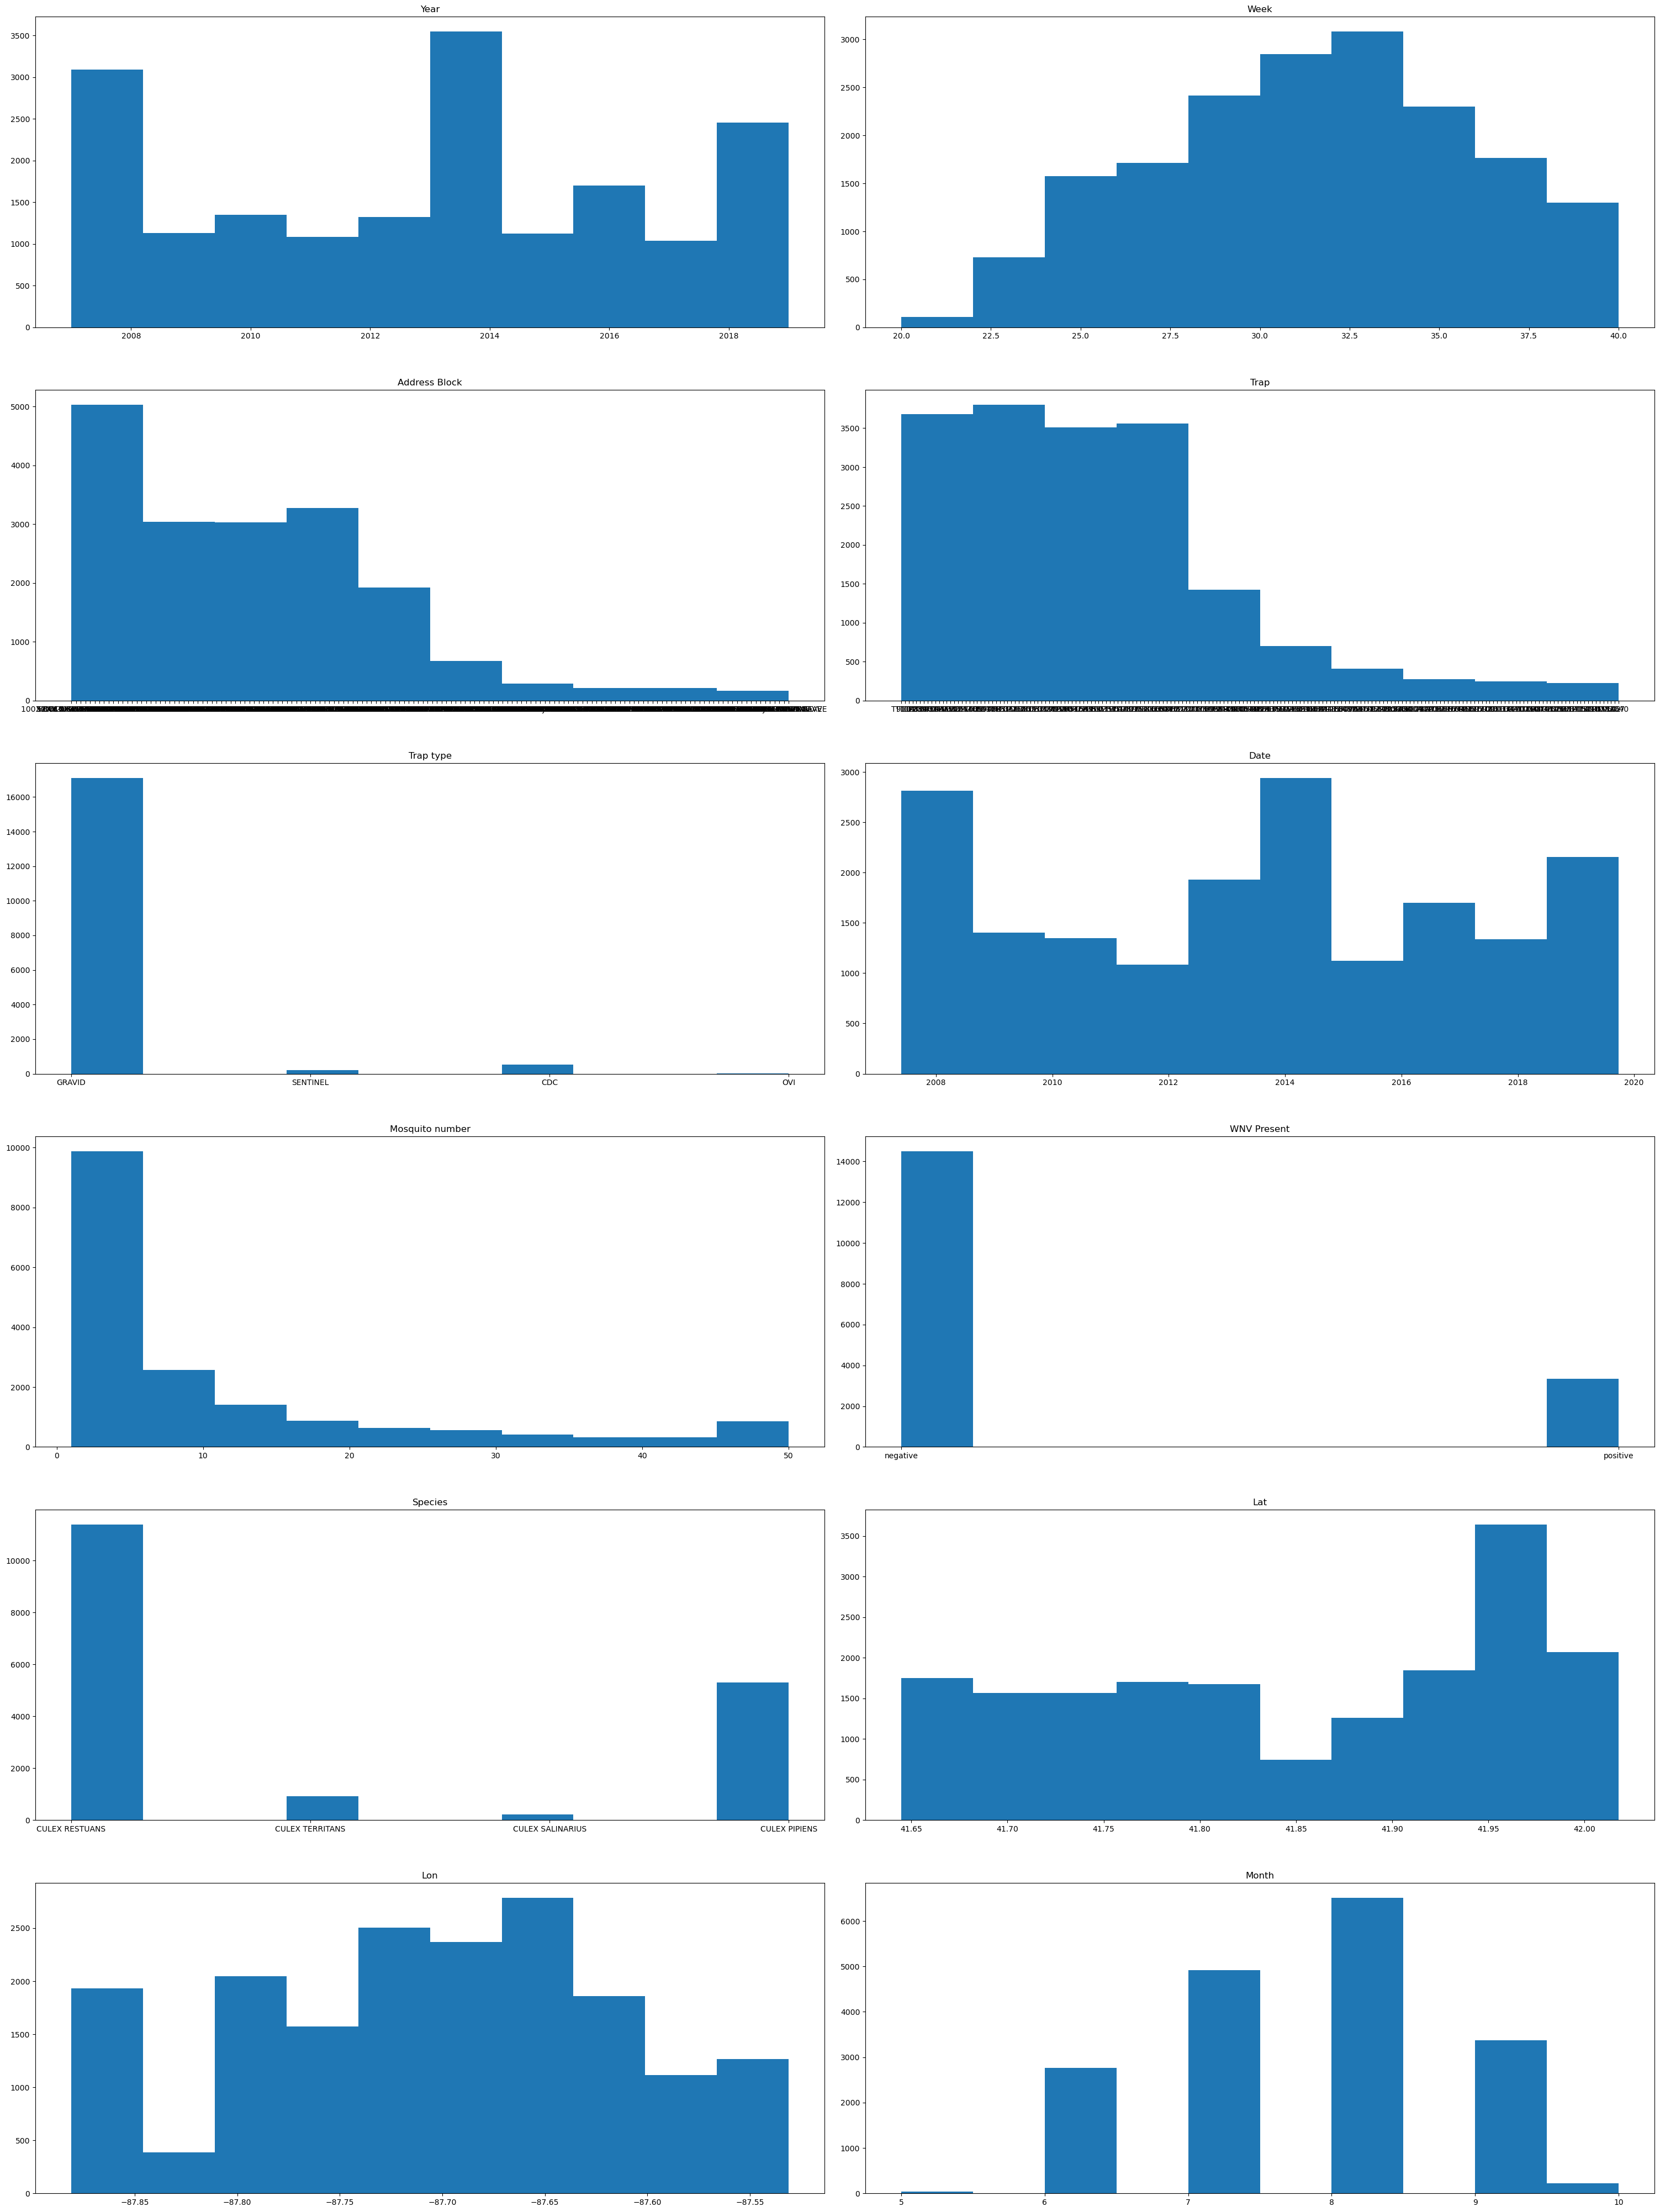

In [20]:
# Lets check out the distributions.

# Setting the plots layout
plt.subplots(6, 2, figsize=(30, 40))

# Plotting
for i, column in enumerate(mosquito_df.columns, 1):
    plt.subplot(6, 2, i)
    plt.hist(mosquito_df[column])
    plt.title(column)
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

Mosquito number (number of mosquitos each trap caught every time) skewed to right , Week is roughly normal distribution 

# 

## 1. Convert the WNV Present column into a binary column and create dummy variables from the Trap type column.

# 

In [21]:
mosquito_df['WNV Present'].value_counts(normalize = True)*100

negative    81.297303
positive    18.702697
Name: WNV Present, dtype: float64

Skew towards negative

let's change the text encoding to binary numeric {0,1}

In [22]:
mosquito_df['WNV Present'] = np.where(mosquito_df['WNV Present'] == 'positive',1,0)

In [23]:
# quickly verify that it worked

mosquito_df['WNV Present'].value_counts()

0    14501
1     3336
Name: WNV Present, dtype: int64

Now let's look at the Trap type column:

In [24]:
# make a helper function for bar charts

def bar_chart_helper(column,fig_width = 10,fig_height = 10):
    
    plt.figure(figsize = (fig_width,fig_height))
    mosquito_df[column].value_counts().sort_values().plot(kind = "barh")
    plt.title(f"column: {column}")
    plt.show()

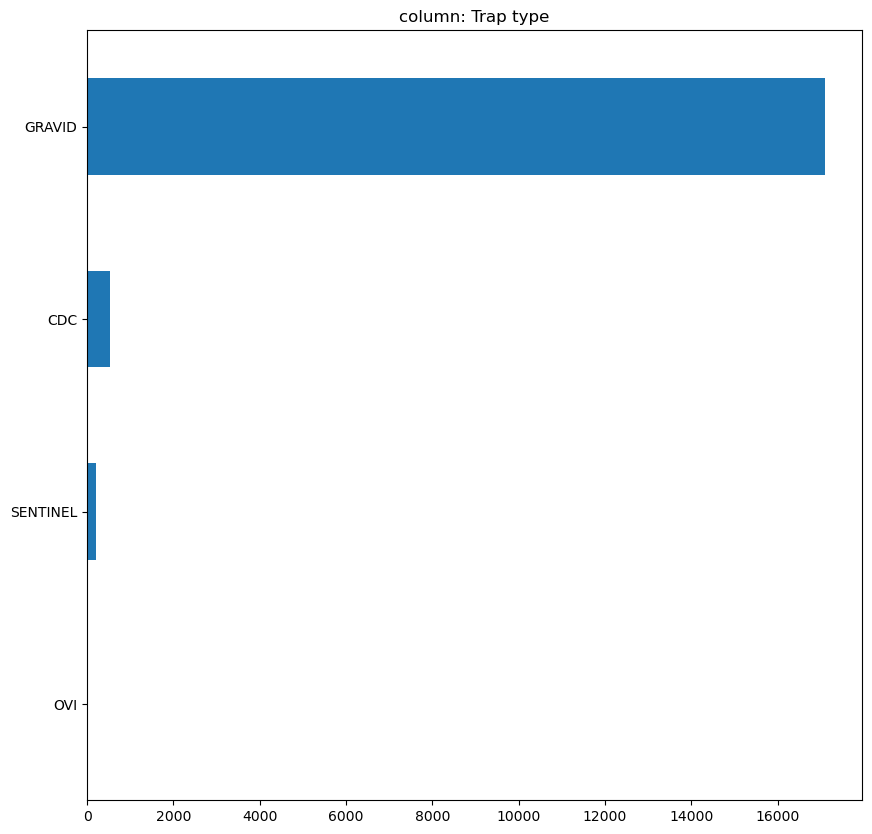

In [25]:
bar_chart_helper('Trap type')

In [26]:
mosquito_df['Trap type'].value_counts()

GRAVID      17098
CDC           529
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64

We have only one OVI Trap type:

In [27]:
mosquito_df.loc[mosquito_df['Trap type'] == 'OVI']

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
15392,2007,23,5XX S CENTRAL AVE,T167,OVI,2007-06-29 11:06:17,1,0,CULEX PIPIENS,41.872873,-87.764737,6


- We have only one OVI Trap type with negative result which we cannot conclude anything about it. So, OVI is the best column to use it as a reference category since we do not want to say anything about the effect of it on the dependent variable.

In [28]:
# try

pd.get_dummies(mosquito_df['Trap type'])

,CDC,GRAVID,OVI,SENTINEL
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18489,0,1,0,0
18490,0,1,0,0
18491,0,1,0,0
18492,0,1,0,0


- We will make a new dataframe with dummy variables for Trap type with having OVI as reference category:

In [29]:
# make a new dataframe with having dummy variables for Trap type without OVI

dummy_df = pd.get_dummies(mosquito_df, columns=['Trap type'])
dummy_df.drop(columns = 'Trap type_OVI', inplace = True)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                17837 non-null  int64         
 1   Week                17837 non-null  int64         
 2   Address Block       17837 non-null  object        
 3   Trap                17837 non-null  object        
 4   Date                17837 non-null  datetime64[ns]
 5   Mosquito number     17837 non-null  int64         
 6   WNV Present         17837 non-null  int32         
 7   Species             17837 non-null  object        
 8   Lat                 17837 non-null  float64       
 9   Lon                 17837 non-null  float64       
 10  Month               17837 non-null  int64         
 11  Trap type_CDC       17837 non-null  uint8         
 12  Trap type_GRAVID    17837 non-null  uint8         
 13  Trap type_SENTINEL  17837 non-null  uint8     

Now we convert the WNV Present column into a binary column and create dummy variables from the Trap type column.

# 

## 2. What is the average number of mosquitoes for each month? What trends do you notice?

# 

In [30]:
average_mosquito = mosquito_df.groupby('Month')['Mosquito number'].mean().reset_index()
average_mosquito.rename(columns={'Mosquito number': 'Average number of Mosquitoes'}, inplace=True)
average_mosquito

,Month,Average number of Mosquitoes
0,5,2.761905
1,6,10.039783
2,7,11.053295
3,8,11.605926
4,9,8.156741
5,10,5.377778


From the table above we can see the average number of mosquitoes in each month

Text(0.5, 1.0, 'The average number of Mosquitoes for each month')

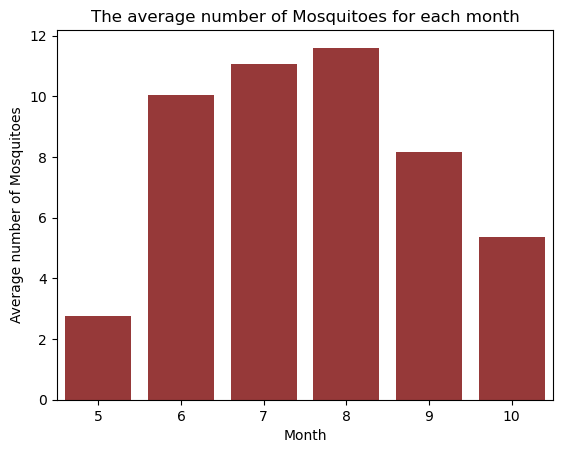

In [31]:

sns.barplot(data=average_mosquito, x="Month", y="Average number of Mosquitoes", color='brown').set_title('The average number of Mosquitoes for each month')


### </font> <font color = magenta > Observations : </font>

- In August, we see the peak and the average number of mosquitoes is in its highest and in may, the average number of mosquitoes is the lowest.
- We can see that in summer months (6,7,8), our traps caught the highest number of mosquitoes. We expect to see that, because in summers we see considerably more mosquitoes.

# 

# Part 2. Statistical Analysis

# 

## 1. Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?

# 

The chi-squared test is a statistical test used to determine if there is a significant difference between the observed frequencies of a categorical variable and the expected frequencies based on a hypothesis. It is commonly used to test the independence of two categorical variables or to test the goodness of fit of a model to observed data.

Here we can check by doing a chi-squared test of independence between the target variable WNV Present, and mosquito species categorical independent variable.

We can test for "independence" between each of our categorical variable ( Species ) and the dependent variable WNV Present. If we see a small p value, that would indicate that the variable in question CAN be used to predict WNV Present.

In [32]:
pd.crosstab(mosquito_df['WNV Present'], mosquito_df['Species'])

Species,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
WNV Present,,,,
0,4074,9309,215,903
1,1237,2078,7,14


In [33]:
stats.chi2_contingency(pd.crosstab(mosquito_df['WNV Present'], mosquito_df['Species']))

(288.313097009138,
 3.3649395840995687e-62,
 3,
 array([[4317.69978135, 9257.3239334 ,  180.48001346,  745.49627179],
        [ 993.30021865, 2129.6760666 ,   41.51998654,  171.50372821]]))

### </font> <font color = magenta > Observations : </font>

- The P-value (the second number, 3.3649395840995687e-62) is very very low (almost zero). So, the null hypothesis is rejected and the difference between the different mosquito species and the presence of West Nile Virus is considered statistically significant.
- This indicates that there is a relationship between the two variables and that they are not independent. However, we do not know which species is doing the work and makes two columns dependent to each other. We can figure it out once we run the logistic regression in part 3. 

# 

## 2. Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

# 

- We will need to preprocess our data so that our categorical variables can be fed into a model.
- To do this, we have to first check whether thay are statistically significant to the dependent variable.
- We can check by doing a chi-squared test of independence between the target variable Mosquito number and each categorical independent variable.

In [34]:
for column in mosquito_df.select_dtypes('object').columns:
    
    ct = pd.crosstab(mosquito_df['Mosquito number'],mosquito_df[column])
    
    p_value = round(stats.chi2_contingency(ct)[1],5)
    
    print(f"p-value for chi2 test: registered vs {column} is: {p_value}")

p-value for chi2 test: registered vs Address Block is: 0.0
p-value for chi2 test: registered vs Trap is: 0.0
p-value for chi2 test: registered vs Trap type is: 0.0
p-value for chi2 test: registered vs Species is: 0.0


We can see that all categorical columns are influential in predicting Mosquito number.

Now let's check Date column. Here we have year, month and week in our columns so we already have date columns separated.
The only thing we do not have is time of each trap performes. Let's check the diversity of time:

In [35]:
mosquito_df["Date"].dt.time

0        00:09:00
1        00:09:00
2        00:09:00
3        00:09:00
4        00:09:00
           ...   
18489    00:08:00
18490    00:09:00
18491    00:08:00
18492    00:07:00
18493    00:08:00
Name: Date, Length: 17837, dtype: object

In [36]:
mosquito_df["Date"].dt.time.nunique()

25

In [37]:
mosquito_df["Date"].dt.hour.unique()

array([ 0,  8,  2, 11,  3,  4], dtype=int64)

In [38]:
mosquito_df["Date"].dt.hour.nunique()

6

- Here we can see that we have 25 different time with minutes and seconds. However, we only have 6 different hours and by checking the diversity of hours, we cannot interpret anything special from them. So, since we have already Year, Month and Week columns, it is good to drop Date column because hours have no use for us.

In [39]:
mosquito_df = mosquito_df.drop(columns=['Date'])

In [40]:
mosquito_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             17837 non-null  int64  
 1   Week             17837 non-null  int64  
 2   Address Block    17837 non-null  object 
 3   Trap             17837 non-null  object 
 4   Trap type        17837 non-null  object 
 5   Mosquito number  17837 non-null  int64  
 6   WNV Present      17837 non-null  int32  
 7   Species          17837 non-null  object 
 8   Lat              17837 non-null  float64
 9   Lon              17837 non-null  float64
 10  Month            17837 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 2.1+ MB


Now we have 11 columns.

So, up to here we have checked that all our categorical columns are statistically significant for the target. To check the correlation of categorical columns, first we have to dummify them. However for Trap and Address Block columns the cardinality is so high and we have so many unique values:

In [41]:
mosquito_df["Trap"].nunique()

190

In [42]:
mosquito_df["Address Block"].nunique()

154

Trap hase 190 and Address Block has 154 unique values. As we checked they were statistically significant for our model. So, we are going to consolidate them by making goups for them and change the diversity and uniqueness:

In [43]:
mosquito_df['Address Block'].value_counts()

100XX W OHARE AIRPORT       1499
41XX N OAK PARK AVE          408
101XX S STONY ISLAND AVE     369
52XX S KOLMAR AVE            349
1XX N CENTRAL PARK DR        335
                            ... 
29XX N KENNETH AVE             2
54XX W PARKER AVE              1
4XX W 127TH ST                 1
104XX S OGLESBY AVE            1
21XX S HAMLIN AVE              1
Name: Address Block, Length: 154, dtype: int64

In [44]:
bin_edges = mosquito_df['Address Block'].value_counts().quantile([0, 0.25, 0.5, 0.75, 1])
bin_edges

0.00       1.0
0.25      12.0
0.50      67.0
0.75     203.5
1.00    1499.0
Name: Address Block, dtype: float64

We see that 100 block has considerably higher number than others. So, here for having a better understanding I will split Address Block column to 6 columns: 5 of highest address value counts and an UNKNOWN column, which other addresses will assigned to this column.

In [90]:
new_mosq_df = mosquito_df
new_mosq_df = new_mosq_df.drop(columns=['Address Block'])

In [91]:
# Define a function that takes a value and returns the mapped value

def map_function(x):
    if x == '100XX W OHARE AIRPORT':
        return '100XX W OHARE AIRPORT'
    elif x == '41XX N OAK PARK AVE':
        return '41XX N OAK PARK AVE'
    elif x == '101XX S STONY ISLAND AVE':
        return '101XX S STONY ISLAND AVE'
    elif x == '52XX S KOLMAR AVE':
        return '52XX S KOLMAR AVE'
    elif x == '1XX N CENTRAL PARK DR':
        return '1XX N CENTRAL PARK DR'
    else:
        return 'UNKNOWN'

# Create the new column by applying the mapping function

new_mosq_df['Address Block'] = mosquito_df['Address Block'].map(map_function)

In [92]:
new_mosq_df

,Year,Week,Trap,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Month,Address Block
0,2019,39,T910,GRAVID,2,0,CULEX RESTUANS,41.977738,-87.880969,9,100XX W OHARE AIRPORT
1,2019,39,T114,GRAVID,1,0,CULEX RESTUANS,41.798211,-87.736925,9,52XX S KOLMAR AVE
2,2019,39,T028,GRAVID,2,0,CULEX RESTUANS,41.987245,-87.689417,9,UNKNOWN
3,2019,39,T228,GRAVID,1,0,CULEX RESTUANS,41.953664,-87.724987,9,UNKNOWN
4,2019,39,T209,GRAVID,9,0,CULEX RESTUANS,41.657069,-87.546049,9,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...
18489,2013,35,T155,GRAVID,3,1,CULEX PIPIENS,41.776009,-87.779408,8,UNKNOWN
18490,2016,36,T043,GRAVID,4,1,CULEX PIPIENS,41.857843,-87.635858,9,UNKNOWN
18491,2007,34,T003,GRAVID,19,1,CULEX PIPIENS,41.965376,-87.758403,8,UNKNOWN
18492,2016,30,T115,GRAVID,34,1,CULEX RESTUANS,41.662395,-87.590176,7,UNKNOWN


Now we have an address block column with 6 values:

In [93]:
new_mosq_df['Address Block'].value_counts()

UNKNOWN                     14877
100XX W OHARE AIRPORT        1499
41XX N OAK PARK AVE           408
101XX S STONY ISLAND AVE      369
52XX S KOLMAR AVE             349
1XX N CENTRAL PARK DR         335
Name: Address Block, dtype: int64

Now let's look at Trap column:

In [94]:
mosquito_df['Trap'].value_counts().quantile([0, 0.25, 0.5, 0.75, 1])

0.00      1.00
0.25     11.00
0.50     40.00
0.75    172.25
1.00    406.00
Name: Trap, dtype: float64

In [95]:
new_mosq_df['Trap'].value_counts()

T002     406
T114     340
T031     333
T008     326
T138     304
        ... 
T167       1
T135B      1
T241       1
T128A      1
T040       1
Name: Trap, Length: 190, dtype: int64

For Trap column we have 190 unique types and it si better to do the same thing we did for Address:

In [96]:
# Define a function that takes a value and returns the mapped value

def map_function2(x):
    if x == 'T002':
        return 'T002'
    elif x == 'T114':
        return 'T114'
    elif x == 'T031':
        return 'T031'
    elif x == 'T008':
        return 'T008'
    elif x == 'T138':
        return 'T138'
    else:
        return 'UNKNOWN'

# Create the new column by applying the mapping function

new_mosq_df['Trap'] = mosquito_df['Trap'].map(map_function2)

In [97]:
new_mosq_df

,Year,Week,Trap,Trap type,Mosquito number,WNV Present,Species,Lat,Lon,Month,Address Block
0,2019,39,UNKNOWN,GRAVID,2,0,CULEX RESTUANS,41.977738,-87.880969,9,100XX W OHARE AIRPORT
1,2019,39,T114,GRAVID,1,0,CULEX RESTUANS,41.798211,-87.736925,9,52XX S KOLMAR AVE
2,2019,39,UNKNOWN,GRAVID,2,0,CULEX RESTUANS,41.987245,-87.689417,9,UNKNOWN
3,2019,39,UNKNOWN,GRAVID,1,0,CULEX RESTUANS,41.953664,-87.724987,9,UNKNOWN
4,2019,39,UNKNOWN,GRAVID,9,0,CULEX RESTUANS,41.657069,-87.546049,9,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...
18489,2013,35,UNKNOWN,GRAVID,3,1,CULEX PIPIENS,41.776009,-87.779408,8,UNKNOWN
18490,2016,36,UNKNOWN,GRAVID,4,1,CULEX PIPIENS,41.857843,-87.635858,9,UNKNOWN
18491,2007,34,UNKNOWN,GRAVID,19,1,CULEX PIPIENS,41.965376,-87.758403,8,UNKNOWN
18492,2016,30,UNKNOWN,GRAVID,34,1,CULEX RESTUANS,41.662395,-87.590176,7,UNKNOWN


Now we have an Trap column with 6 values:

In [98]:
new_mosq_df['Trap'].value_counts()

UNKNOWN    16128
T002         406
T114         340
T031         333
T008         326
T138         304
Name: Trap, dtype: int64

- The reason I try to check the values with most counts for Address Block and Trap columns was because I think those which had the most value counts are more likely to influence the target value.

Now, we are ready to dummify our categorical variables.

In [99]:
pd.get_dummies(new_mosq_df).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    17837 non-null  int64  
 1   Week                                    17837 non-null  int64  
 2   Mosquito number                         17837 non-null  int64  
 3   WNV Present                             17837 non-null  int32  
 4   Lat                                     17837 non-null  float64
 5   Lon                                     17837 non-null  float64
 6   Month                                   17837 non-null  int64  
 7   Trap_T002                               17837 non-null  uint8  
 8   Trap_T008                               17837 non-null  uint8  
 9   Trap_T031                               17837 non-null  uint8  
 10  Trap_T114                               17837 non-null  ui

Let's check Species column:

In [100]:
new_mosq_df['Species'].value_counts()

CULEX RESTUANS      11387
CULEX PIPIENS        5311
CULEX TERRITANS       917
CULEX SALINARIUS      222
Name: Species, dtype: int64

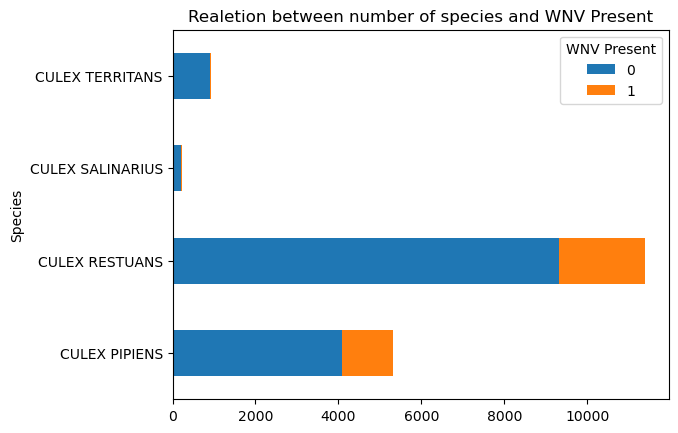

In [103]:
agg_df = mosquito_df.groupby(['Species','WNV Present'])['Species'].count()
agg_df.unstack().plot(kind = 'barh',stacked = True).set_title('Realetion between number of species and WNV Present')
plt.show()

For reference category columns: UNKNOWN for address block and Trap is obvious. we checked Trap type, OVI in part 1. For Species we see that SALINARIUS has the lowest number and by observing the stackplot we see it has lowest influence on WNV Present and number of mosquitoes. So, we will choose SALINARIUS as reference category. 

In [104]:
reference_categories = ['Trap_UNKNOWN','Trap type_OVI','Address Block_UNKNOWN','Species_CULEX SALINARIUS']

dummy_df = pd.get_dummies(new_mosq_df)
dummy_df.drop(columns = reference_categories,inplace = True)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    17837 non-null  int64  
 1   Week                                    17837 non-null  int64  
 2   Mosquito number                         17837 non-null  int64  
 3   WNV Present                             17837 non-null  int32  
 4   Lat                                     17837 non-null  float64
 5   Lon                                     17837 non-null  float64
 6   Month                                   17837 non-null  int64  
 7   Trap_T002                               17837 non-null  uint8  
 8   Trap_T008                               17837 non-null  uint8  
 9   Trap_T031                               17837 non-null  uint8  
 10  Trap_T114                               17837 non-null  ui

4 columns droped. We have 23 columns now. Now let's move to correlation part:

In [117]:
# split our data into independent variable matrix
# and dependent variable vector
# we have to drop WNV Present and Mosquito number for independent variable matrix

X = dummy_df.drop(columns=['WNV Present', 'Mosquito number'],axis = 1)

y = dummy_df['Mosquito number']

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    17837 non-null  int64  
 1   Week                                    17837 non-null  int64  
 2   Lat                                     17837 non-null  float64
 3   Lon                                     17837 non-null  float64
 4   Month                                   17837 non-null  int64  
 5   Trap_T002                               17837 non-null  uint8  
 6   Trap_T008                               17837 non-null  uint8  
 7   Trap_T031                               17837 non-null  uint8  
 8   Trap_T114                               17837 non-null  uint8  
 9   Trap_T138                               17837 non-null  uint8  
 10  Trap type_CDC                           17837 non-null  ui

##### Let's observe the correlation between Mosquito number and predictor columns:

In [116]:
dummy_df.corr()["Mosquito number"].sort_values(ascending=False)

Mosquito number                           1.000000
WNV Present                               0.389764
Trap_T002                                 0.143681
Address Block_41XX N OAK PARK AVE         0.143282
Address Block_101XX S STONY ISLAND AVE    0.127216
Year                                      0.119070
Trap type_SENTINEL                        0.116512
Trap_T008                                 0.101866
Trap type_CDC                             0.099810
Trap_T138                                 0.085677
Address Block_100XX W OHARE AIRPORT       0.078701
Lat                                       0.075713
Species_CULEX RESTUANS                    0.066797
Address Block_52XX S KOLMAR AVE           0.040651
Address Block_1XX N CENTRAL PARK DR       0.036569
Trap_T114                                 0.033527
Species_CULEX PIPIENS                     0.019626
Trap_T031                                -0.028020
Week                                     -0.033293
Month                          

### </font> <font color = magenta > Observations : </font>

- We see that `Trap_T002 ` and `Address Block_41XX N OAK PARK AVE` show a weak positive correlation at 0.14 ( we should ignore WNV Present), and there is some weak negative correlation with `Species_CULEX TERRITANS` and `Trap type_GRAVID ` at - 0.15 and -0.14.

# 

# Part 3. Advanced Statistical Analysis

# 

## 1. Linear Regression

# 

## Step 1: Verifying assumptions associated with linear regression models

There are four assumptions associated with a linear regression model:

1. **Linearity**: The relationship between the predictor and target variable to be linear.
2. **Independence/No Multicollinearity**: The predictor variable are independent of each other.
3. **Residuals**: are normally distributed.**
4. **Homoscedasticity**: The variance of residual is the same for any value of X.**

`** Will be tested after modelling.`

### 1.1. Linearity
One of the assumptions when building a linear regression model is that there is a linear relationship between the predictor variables and the target variable. Let's plot the relationship between X and y.

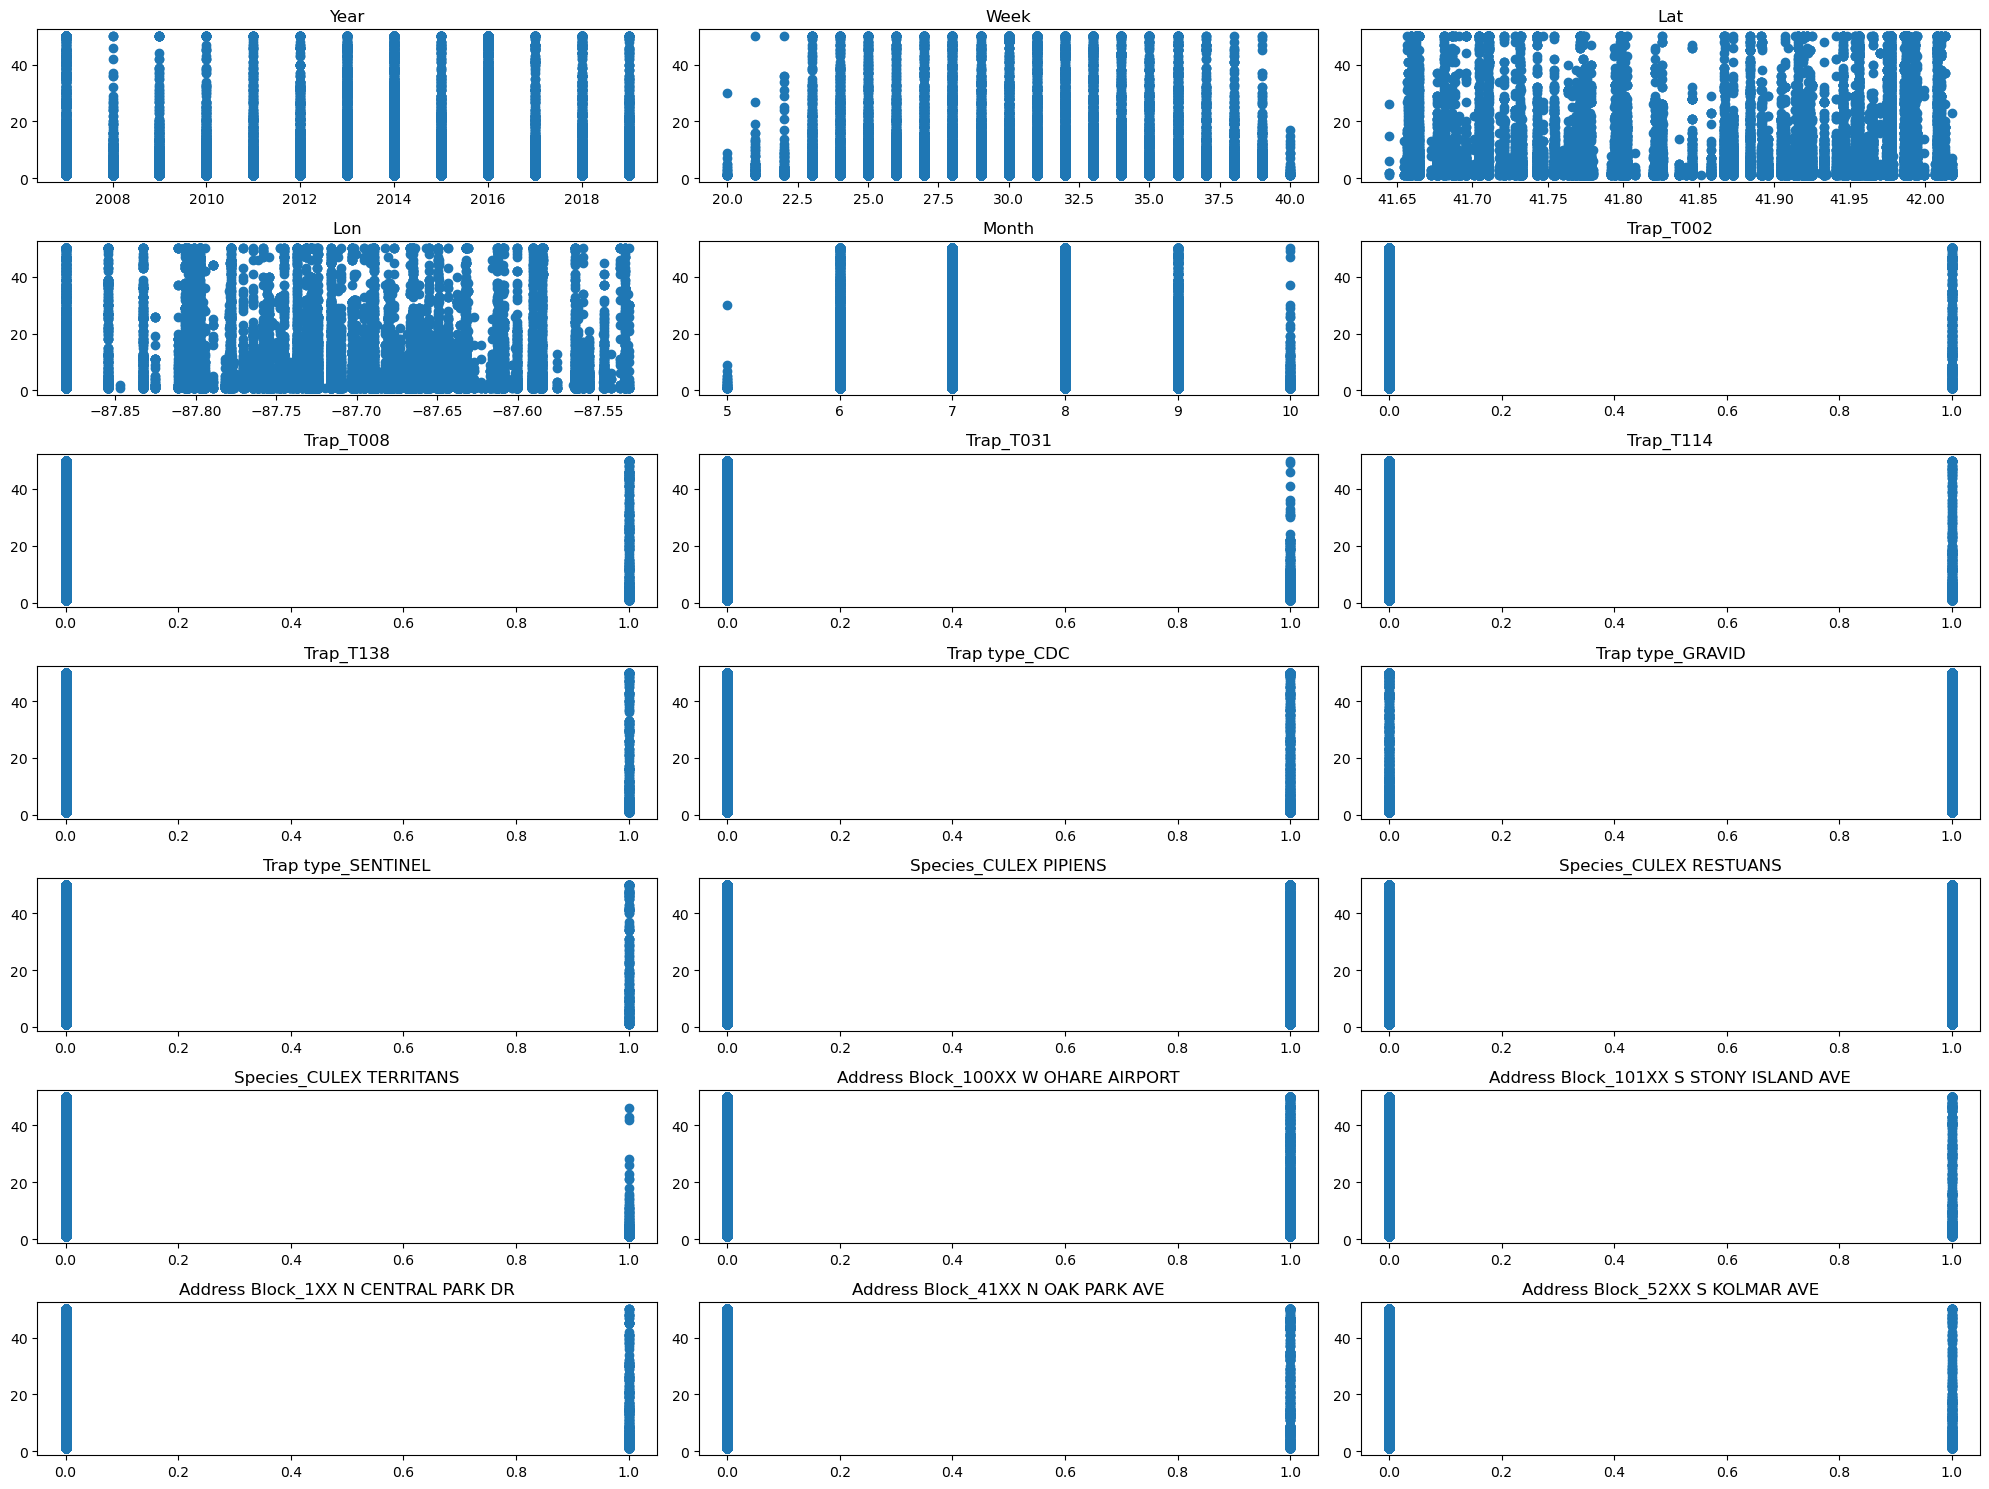

In [113]:
# Loop over the columns and plot the relationship between each column and the target
plt.subplots(7, 3, figsize=(20, 15))

count = 1

for col in X.columns:
    plt.subplot(7, 3, count)
    plt.scatter(X[col], y)
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

We cannot observe any linear relationship between Target and our columns. It seems that our columns are less likely to be useful in a linear model in their current format. As we saw in part 2 question2, the correlation between target and other columns was so weak:

In [116]:
dummy_df.corr()["Mosquito number"].sort_values(ascending=False)

Mosquito number                           1.000000
WNV Present                               0.389764
Trap_T002                                 0.143681
Address Block_41XX N OAK PARK AVE         0.143282
Address Block_101XX S STONY ISLAND AVE    0.127216
Year                                      0.119070
Trap type_SENTINEL                        0.116512
Trap_T008                                 0.101866
Trap type_CDC                             0.099810
Trap_T138                                 0.085677
Address Block_100XX W OHARE AIRPORT       0.078701
Lat                                       0.075713
Species_CULEX RESTUANS                    0.066797
Address Block_52XX S KOLMAR AVE           0.040651
Address Block_1XX N CENTRAL PARK DR       0.036569
Trap_T114                                 0.033527
Species_CULEX PIPIENS                     0.019626
Trap_T031                                -0.028020
Week                                     -0.033293
Month                          



- We see that `Trap_T002 ` and `Address Block_41XX N OAK PARK AVE` show a weak positive correlation at 0.14 ( we should ignore WNV Present), and there is some weak negative correlation with `Species_CULEX TERRITANS` and `Trap type_GRAVID ` at - 0.15 and -0.14.

### 1.2. Independence or No Multicollienearity

Another important assumption when building a linear regression is that there is no collinearity: the predictor variables are independent of each other.

In [120]:
# Correlation between independent variables
X_corr = X.corr().style.background_gradient()
X_corr

,Year,Week,Lat,Lon,Month,Trap_T002,Trap_T008,Trap_T031,Trap_T114,Trap_T138,Trap type_CDC,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS,Address Block_100XX W OHARE AIRPORT,Address Block_101XX S STONY ISLAND AVE,Address Block_1XX N CENTRAL PARK DR,Address Block_41XX N OAK PARK AVE,Address Block_52XX S KOLMAR AVE
Year,1.000000,-0.022322,0.079225,-0.069592,-0.101332,0.012248,-0.009673,0.031698,0.024794,-0.007956,-0.260390,0.150806,0.132026,-0.344756,0.339013,0.008907,0.065047,0.022799,0.044911,0.012851,0.027551
Week,-0.022322,1.000000,-0.007587,0.011429,0.949814,0.016272,-0.013308,0.017407,0.000572,0.010326,0.028467,-0.047458,0.043962,0.317479,-0.317208,0.038288,-0.034698,0.019500,0.020379,0.016751,0.004281
Lat,0.079225,-0.007587,1.000000,-0.738303,-0.015313,0.142683,0.189006,0.028720,-0.061631,-0.158770,-0.062280,0.060599,-0.014152,-0.049304,0.071086,-0.050970,0.339746,-0.175183,0.041934,0.143035,-0.062464
Lon,-0.069592,0.011429,-0.738303,1.000000,0.017991,-0.149793,-0.105277,-0.086155,-0.044867,0.176037,0.055521,-0.075455,0.052536,0.014686,-0.044212,0.069417,-0.572490,0.194316,-0.013254,-0.150166,-0.045468
Month,-0.101332,0.949814,-0.015313,0.017991,1.000000,0.011789,-0.010264,0.012738,-0.002603,0.012904,0.069957,-0.078674,0.036255,0.332230,-0.329964,0.034262,-0.040143,0.019789,0.019165,0.012043,0.002417
Trap_T002,0.012248,0.016272,0.142683,-0.149793,0.011789,1.000000,-0.020824,-0.021050,-0.021275,-0.020096,-0.026681,0.031729,-0.016618,0.016534,-0.001711,-0.027018,-0.046228,-0.022182,-0.021114,0.997489,-0.021560
Trap_T008,-0.009673,-0.013308,0.189006,-0.105277,-0.010264,-0.020824,1.000000,-0.018819,-0.019020,-0.017966,-0.023854,0.028366,-0.014857,0.002684,0.002512,-0.010916,-0.041329,-0.019831,-0.018877,-0.020876,-0.019275
Trap_T031,0.031698,0.017407,0.028720,-0.086155,0.012738,-0.021050,-0.018819,1.000000,-0.019227,-0.018162,0.007628,0.001655,-0.015018,-0.010101,-0.016883,0.059796,-0.041779,-0.020047,-0.019082,-0.021103,-0.019485
Trap_T114,0.024794,0.000572,-0.061631,-0.044867,-0.002603,-0.021275,-0.019020,-0.019227,1.000000,-0.018356,-0.024370,0.028981,-0.015179,-0.008281,0.005928,0.012106,-0.042224,-0.020260,-0.019286,-0.021328,0.986768
Trap_T138,-0.007956,0.010326,-0.158770,0.176037,0.012904,-0.020096,-0.017966,-0.018162,-0.018356,1.000000,0.145499,-0.116077,-0.014338,0.018456,-0.013587,-0.007117,-0.039885,0.905977,-0.018217,-0.020147,-0.018602


Large tables like this are hard to parse through, let's visualize the correlation using a heatmap:

<AxesSubplot:>

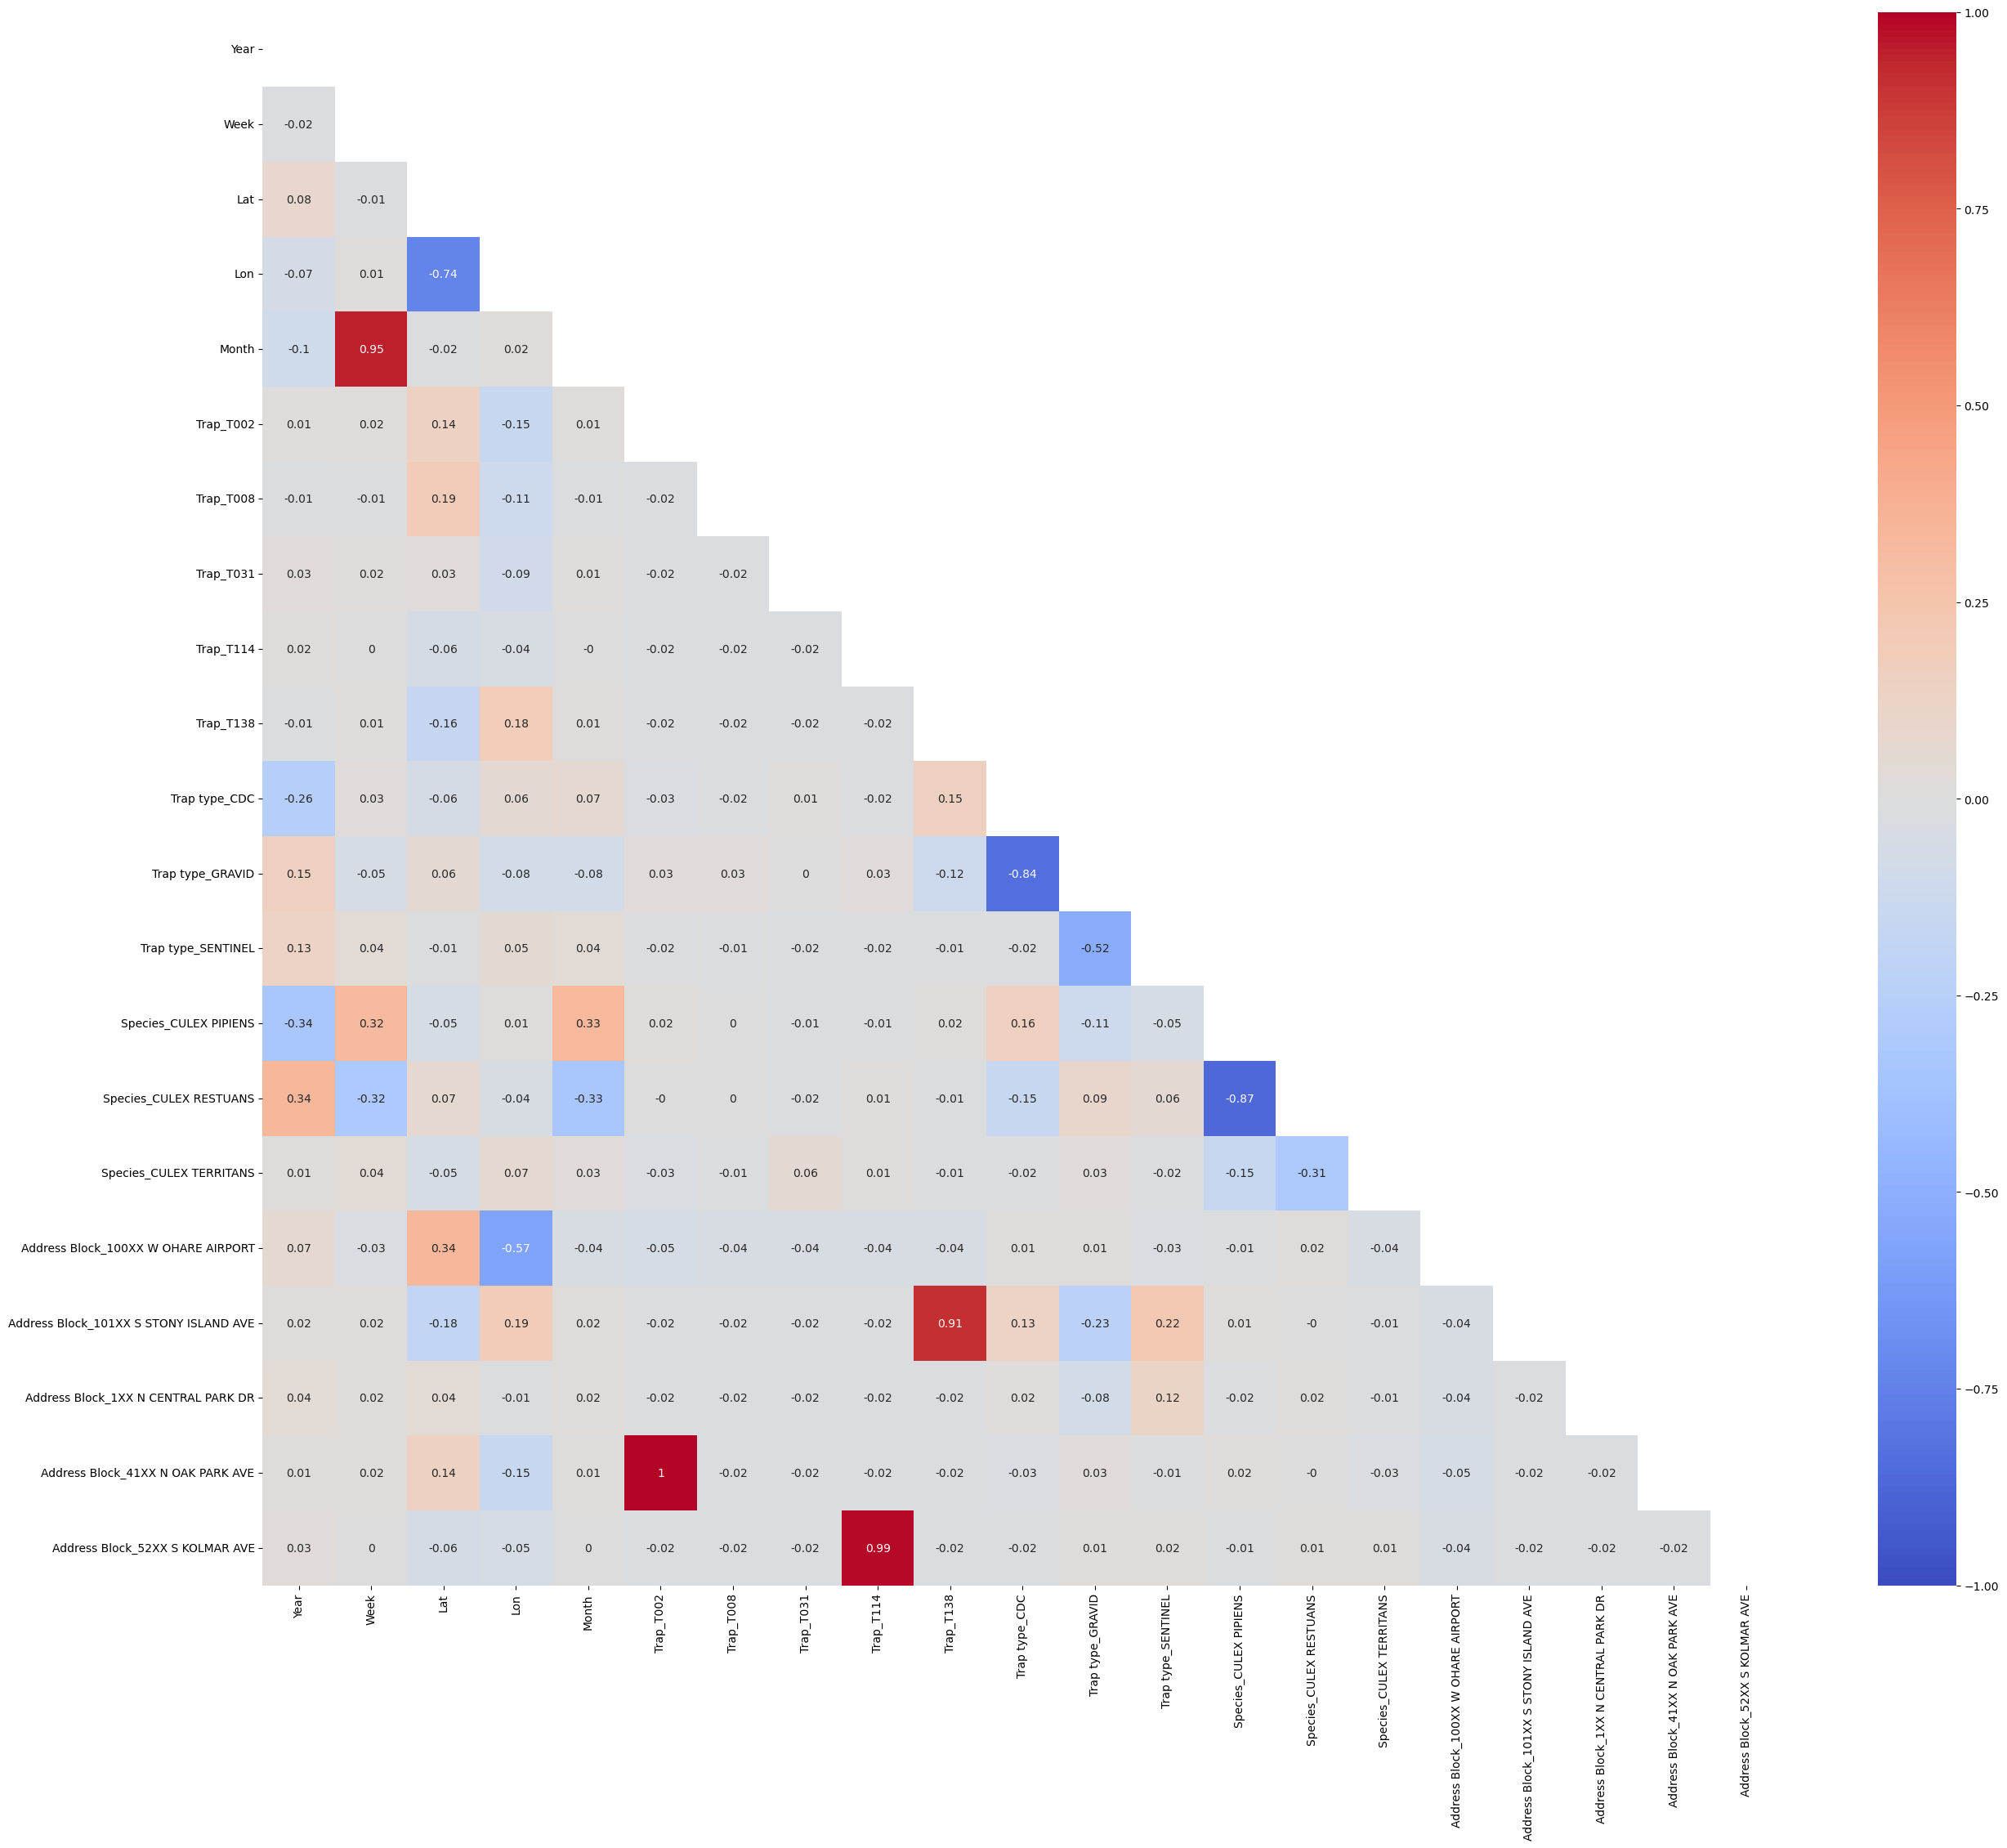

In [108]:
corr_df = X.corr()

# create a mask for the upper triangle in the corr matrix

mask = np.triu(corr_df)

# visualize with a heatmap

plt.figure(figsize = (30,25))

sns.heatmap(corr_df.round(2),annot = True,vmax = 1,vmin = -1,cmap = 'coolwarm',mask = mask)

Values above 0.5 are usually a concern. As we can see above, there is some strong collinearity in this dataset: for example, Trap_T002 is highly correlated with Address Block_41XX N OAK PARK AVE, and unsuprisingly Lat is negatively correlated with Lon column. We need to make sure to keep this in mind when building our model.
Columns with high positive correlation: 
- Trap_T002 and Address Block_41XX N OAK PARK AVE : 1
- Trap_T114 and Address Block_52XX S KOLMAR AVE : 0.99
- Month and Week : 0.95
- Trap_T138 and Address Block_101XX S STONY ISLAND AVE : 0.91

Columns with high negative correlation:
- Species_CULEX PIPIENS and Species_CULEX RESTUANS : -0.87 
- Trap type_CDC and Trap type_GRAVID : -0.84
- Lat and Lon : -0.74
- Lon and Address Block_100XX W OHARE AIRPORT : -0.57
- Trap type_SENTINEL and Trap type_GRAVID : -0.52

We could look at Variance Inflation Factor (VIF) to detect multicollinearity but in dataset information it has been said that the dataset does not respond well to performing VIF analysis, so this is not required. 

## Step 2: Variable selection for model

In [126]:
# import statsmodels linear model for our regression
from statsmodels.regression import linear_model 
import statsmodels.api as sm


In [123]:
# Add constant for modeling
X = sm.add_constant(X)

# Double check for our constant
X.head()

,const,Year,Week,Lat,Lon,Month,Trap_T002,Trap_T008,Trap_T031,Trap_T114,...,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS,Address Block_100XX W OHARE AIRPORT,Address Block_101XX S STONY ISLAND AVE,Address Block_1XX N CENTRAL PARK DR,Address Block_41XX N OAK PARK AVE,Address Block_52XX S KOLMAR AVE
0,1.0,2019,39,41.977738,-87.880969,9,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,1.0,2019,39,41.798211,-87.736925,9,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
2,1.0,2019,39,41.987245,-87.689417,9,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,1.0,2019,39,41.953664,-87.724987,9,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1.0,2019,39,41.657069,-87.546049,9,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


Since we have too many columns I will go with Forward or Bottom-up approach:


### 2.1. Forward or Bottom-Up approach<a class="anchor" id="Forward"></a>

Let's take a bottom-up approach to building a linear model using only the most correlated variables. We will start with choosing one variable (usually the variable with the highest correlation with our target variable) and then we will add more variables and see if the $R^2$ improves.



#### Model 2.1.1.

Let's look at our correlations with the target variable again:

In [124]:
# Let's take a look at the variables with highest correlation with y (`MedHouseVal`)

dummy_df.corr()["Mosquito number"].sort_values(ascending=False)

Mosquito number                           1.000000
WNV Present                               0.389764
Trap_T002                                 0.143681
Address Block_41XX N OAK PARK AVE         0.143282
Address Block_101XX S STONY ISLAND AVE    0.127216
Year                                      0.119070
Trap type_SENTINEL                        0.116512
Trap_T008                                 0.101866
Trap type_CDC                             0.099810
Trap_T138                                 0.085677
Address Block_100XX W OHARE AIRPORT       0.078701
Lat                                       0.075713
Species_CULEX RESTUANS                    0.066797
Address Block_52XX S KOLMAR AVE           0.040651
Address Block_1XX N CENTRAL PARK DR       0.036569
Trap_T114                                 0.033527
Species_CULEX PIPIENS                     0.019626
Trap_T031                                -0.028020
Week                                     -0.033293
Month                          

As we can see above, `Mosquito number` is correlated the most with `Species_CULEX TERRITANS `. Let's build a model only including this variable:

In [127]:
my_linreg1 = linear_model.OLS(y, X[['const', 'Species_CULEX TERRITANS']]).fit()
my_linreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     409.7
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           4.48e-90
Time:                        04:22:30   Log-Likelihood:                -71107.
No. Observations:               17837   AIC:                         1.422e+05
Df Residuals:                   17835   BIC:                         1.422e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      10.9187      0.100    108.963      0.000      10.722      11.115
Species_CULEX TERRITANS    -8.9448      0.442    -20.240      0.000      -9.811      -8.079
==============================================================================
Omnibus:                     5154.442   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11475.007
Skew:                           1.697   Prob(JB):                         0.00
Kurtosis:                       4.979   Cond. No.                         4.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 2.1.1 | Species_CULEX TERRITANS                    | 0.022 |

#### Model 2.1.2.

- Let's take review our correlations again, and add in the variables with the highest correlations:
- We know that some of the variables are highly collinear as was shown by the high correlation values in Step 1
- So we will not add them at the same time and we are just going to add one by one in each pair of them
- The one with highest correlation will be added to the model

The pairs were:
 
- Species_CULEX PIPIENS and Species_CULEX RESTUANS
- Trap type_CDC and Trap type_GRAVID 
- Lat and Lon 
- Lon and Address Block_100XX W OHARE AIRPORT
- Trap type_SENTINEL and Trap type_GRAVID 

and:


-    Trap_T002 and Address Block_41XX N OAK PARK AVE
-    Trap_T114 and Address Block_52XX S KOLMAR AVE
-    Month and Week
-    Trap_T138 and Address Block_101XX S STONY ISLAND AVE


In [129]:
# Let's take review our correlations again, and add in the variables with the highest correlations:
# We know that some of the variables are highly collinear as was shown by the high correlation values in Step 1

dummy_df.corr()["Mosquito number"].sort_values(ascending=False)

Mosquito number                           1.000000
WNV Present                               0.389764
Trap_T002                                 0.143681
Address Block_41XX N OAK PARK AVE         0.143282
Address Block_101XX S STONY ISLAND AVE    0.127216
Year                                      0.119070
Trap type_SENTINEL                        0.116512
Trap_T008                                 0.101866
Trap type_CDC                             0.099810
Trap_T138                                 0.085677
Address Block_100XX W OHARE AIRPORT       0.078701
Lat                                       0.075713
Species_CULEX RESTUANS                    0.066797
Address Block_52XX S KOLMAR AVE           0.040651
Address Block_1XX N CENTRAL PARK DR       0.036569
Trap_T114                                 0.033527
Species_CULEX PIPIENS                     0.019626
Trap_T031                                -0.028020
Week                                     -0.033293
Month                          

In [166]:
my_linreg2 = linear_model.OLS(y, X[['const', 'Species_CULEX TERRITANS', 'Trap type_GRAVID', 'Trap_T002'
                                    , 'Address Block_101XX S STONY ISLAND AVE','Trap_T138','Trap_T008',
                                    'Address Block_1XX N CENTRAL PARK DR','Address Block_100XX W OHARE AIRPORT',
                                    'Species_CULEX RESTUANS','Address Block_52XX S KOLMAR AVE','Month']]).fit()
my_linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     184.8
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:17:34   Log-Likelihood:                -70346.
No. Observations:               17837   AIC:                         1.407e+05
Df Residuals:                   17825   BIC:                         1.408e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     20.8191      0.959     21.706      0.000      18.939      22.699
Species_CULEX TERRITANS                   -7.6684      0.448    -17.107      0.000      -8.547      -6.790
Trap type_GRAVID                          -7.9948      0.501    -15.951      0.000      -8.977      -7.012
Trap_T002                                 13.7656      0.629     21.877      0.000      12.532      14.999
Address Block_101XX S STONY ISLAND AVE    18.8898      1.629     11.597      0.000      15.697      22.083
Trap_T138                                -10.4486      1.754     -5.957      0.000     -13.887      -7.010
Trap_T008                                 11.2733      0.700     16.105      0.000       9.901      12.645
Address Block_1XX N CENTRAL PARK DR        3.7148      0.694      5.354      0.000       2.355       5.075
Address Block_100XX W OHARE AIRPORT        4.4511      0.339     13.113      0.000       3.786       5.116
Species_CULEX RESTUANS                     0.5772      0.219      2.638      0.008       0.148       1.006
Address Block_52XX S KOLMAR AVE            5.3253      0.677      7.868      0.000       3.999       6.652
Month                                     -0.5184      0.099     -5.239      0.000      -0.712      -0.324
==============================================================================
Omnibus:                     4653.841   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9854.380
Skew:                           1.546   Prob(JB):                         0.00
Kurtosis:                       4.922   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Assessment with R<sup>2<sup/>** <br>
    
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 2.1.1 | Species_CULEX TERRITANS                    | 0.022 |
| 2.1.2 | All variables with non-multicollinearity   | 0.102 |


In [167]:
my_linreg3 = linear_model.OLS(y, X[['const', 'Species_CULEX TERRITANS', 'Trap type_GRAVID', 'Trap_T002'
                                    , 'Address Block_101XX S STONY ISLAND AVE','Trap_T138','Trap_T008',
                                    'Address Block_1XX N CENTRAL PARK DR','Address Block_100XX W OHARE AIRPORT',
                                    'Species_CULEX RESTUANS','Address Block_52XX S KOLMAR AVE','Month','Year']]).fit()
my_linreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     197.3
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:17:44   Log-Likelihood:                -70197.
No. Observations:               17837   AIC:                         1.404e+05
Df Residuals:                   17824   BIC:                         1.405e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   -922.0969     54.446    -16.936      0.000   -1028.816    -815.378
Species_CULEX TERRITANS                   -8.6265      0.448    -19.257      0.000      -9.505      -7.748
Trap type_GRAVID                          -9.3322      0.503    -18.552      0.000     -10.318      -8.346
Trap_T002                                 13.5636      0.624     21.732      0.000      12.340      14.787
Address Block_101XX S STONY ISLAND AVE    15.7464      1.626      9.687      0.000      12.560      18.933
Trap_T138                                 -7.5828      1.747     -4.339      0.000     -11.008      -4.158
Trap_T008                                 11.3689      0.694     16.377      0.000      10.008      12.730
Address Block_1XX N CENTRAL PARK DR        3.0051      0.689      4.359      0.000       1.654       4.356
Address Block_100XX W OHARE AIRPORT        4.0171      0.338     11.900      0.000       3.355       4.679
Species_CULEX RESTUANS                    -0.7563      0.230     -3.285      0.001      -1.208      -0.305
Address Block_52XX S KOLMAR AVE            4.9812      0.672      7.418      0.000       3.665       6.297
Month                                     -0.5638      0.098     -5.744      0.000      -0.756      -0.371
Year                                       0.4697      0.027     17.321      0.000       0.417       0.523
==============================================================================
Omnibus:                     4641.730   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9857.657
Skew:                           1.539   Prob(JB):                         0.00
Kurtosis:                       4.947   Cond. No.                     1.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 2.1.1 | All                                        | 0.022 |
| 2.1.2 | All variables with non-multicollinearity           | 0.102 |
| 2.1.3 | All variables with non-multicollinearity with year | 0.117 |

### </font> <font color = magenta > Observations : </font>

- After adding year column, although we saw slight increase in R squared, we can see that our model shows strong multicollinearity. 
- In the information for this question has been noted that we would likely see a low R^2 value. So, low R squared number was expected.
- I believe the best fitted model with non-multicollinearity is the second one ( 2.1.2).
- </font> <font color = green >At the end, I believe running a linear regression model is not a good option for this dataset. </font>
- However, Let's check for Residuals and homoscedasticity

## Step 3: Model Diagnostics 


We need to check two of the four assumptions associated with a linear regression model:

3. **Residuals** are normally distributed.
4. **Homoscedasticity**: The variance of residual is the same for any value of X.


### 3.1 Residuals 
- A residual plot can help to visualize whether the error in the model is random or non-random 
- The distribution of the residual values should appear to be normally distributed

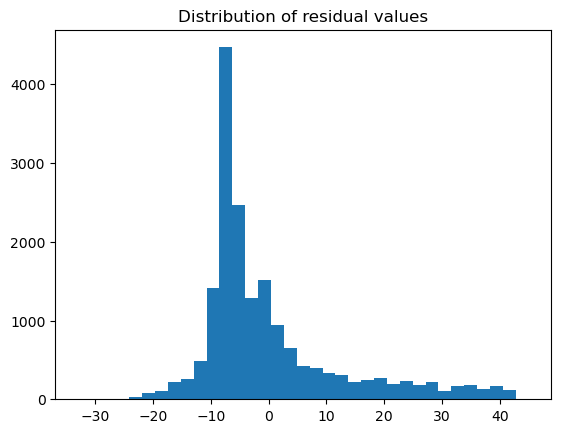

In [168]:
# Plotting the residuals of the model 3.1.2
plt.figure()
plt.hist(my_linreg2.resid, bins = 35)
plt.title('Distribution of residual values')
plt.show()

The distribution of residual values have bell shape but it is not close to a normal distribution and there is a longer right tail. Let's take a look at the Shaprio-Wilk test.

As a reminder:

$$ H_0 : \text{Data is normally distributed}  \quad vs. \quad H_1 : \text{Data is not normally distributed} $$

In [169]:
# calculating the shapiro test statisic and its p-value

print("Shapiro-Wilk Test: ", stats.shapiro(my_linreg2.resid))


Shapiro-Wilk Test:  ShapiroResult(statistic=0.8197363615036011, pvalue=0.0)


C:\Users\mahya\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The null hypothesis for the Shapiro-Wilk test is that the data are normally distributed. 
Because the p-value is less than 0.05, then the null hypothesis that the data are normally distributed is rejected.

The Shapiro-Wilk test is very sensitive! Let's try a normal Q-Q plot:

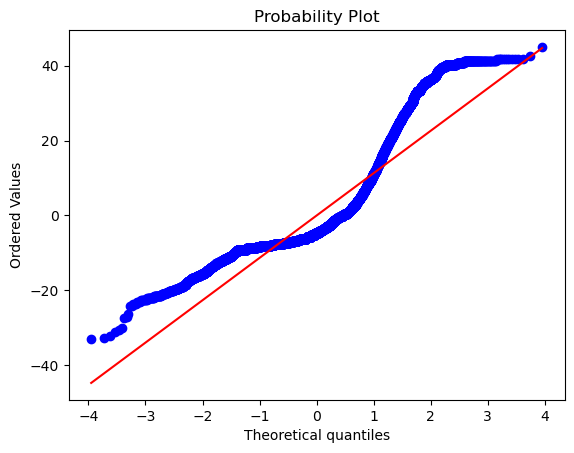

In [174]:
# Normal Q-Q plot

plt.figure()
stats.probplot(my_linreg2.resid, dist="norm", plot=plt)
plt.show()

Here we can see that the blue line is near the red line but it is not fitted. So , Residuals are not normally distributed.

### 3.2 Homoscedasticity


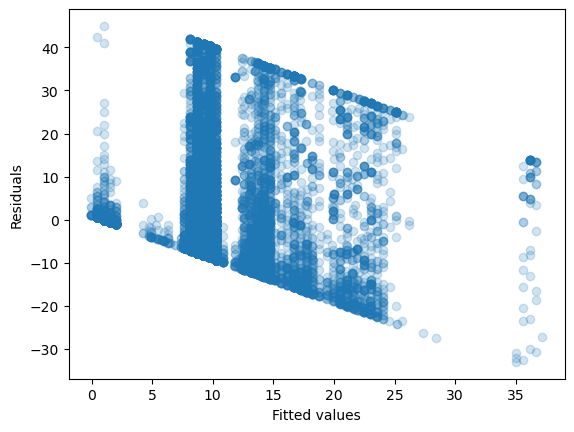

In [176]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(my_linreg2.fittedvalues, my_linreg2.resid, alpha=0.2)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

For the most part the residuals does not look random, there is a funnel shaped pattern here (which shows that the variance is getting smaller as the fitted values increase). So we can conclude that the residuals do not satisfy all our assumptions. Therefore, this model is not fully reliable, meaning that the p-values and coefficients cannot be trusted. 


## 4. Conclusion

- We saw that our R squared was low and the residuals and assumptions did not satisfy us at all. I believe Linear regression model is not suitable for Mosquito number at all and we have to use other complex models to reach to a fitted high R squared model.

# 

# 2. Logistic Regression

# 

### Analysis plan
 

We saw that we change all of our categorical values to dummy ones to be fed into model in Part 2 and also we had chi squared test in part 2 for WNV Present.

Since the data has been preprocessed we can proceed to build our logistic model models. the target variable is WNV Present {1,0}.

Leading up to logistic regression, we might also do some hypothesis testing to decide which variables should be in the model and which can be discarded.

Here we can check by doing a chi-squared test of independence between the target variable WNV Present, and categorical independent variables:


In [178]:
for column in mosquito_df.select_dtypes('object').columns:
    
    ct = pd.crosstab(mosquito_df['WNV Present'],mosquito_df[column])
    
    p_value = round(stats.chi2_contingency(ct)[1],5)
    
    print(f"p-value for chi2 test: registered vs {column} is: {p_value}")

p-value for chi2 test: registered vs Address Block is: 0.0
p-value for chi2 test: registered vs Trap is: 0.0
p-value for chi2 test: registered vs Trap type is: 0.0
p-value for chi2 test: registered vs Species is: 0.0


- The P-value is zero. So, the null hypothesis is rejected and the difference between the independent columns and the presence of West Nile Virus is considered statistically significant.
- This indicates that there is a relationship between  variables and that they are not independent. However, we do not know which species is doing the work and makes two columns dependent to each other. We can figure it out once we run the logistic regression model.


### Modeling

Now that we are satisfied and since our data is ready from previous questions and we had some hypothesis tests in previous questions too, we proceed to the model building phase of our analysis.

In [180]:
# split our data into independent variable matrix
# and dependent variable vector

X = dummy_df.drop('WNV Present',axis = 1)
y = dummy_df['WNV Present']

In [181]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    17837 non-null  int64  
 1   Week                                    17837 non-null  int64  
 2   Mosquito number                         17837 non-null  int64  
 3   Lat                                     17837 non-null  float64
 4   Lon                                     17837 non-null  float64
 5   Month                                   17837 non-null  int64  
 6   Trap_T002                               17837 non-null  uint8  
 7   Trap_T008                               17837 non-null  uint8  
 8   Trap_T031                               17837 non-null  uint8  
 9   Trap_T114                               17837 non-null  uint8  
 10  Trap_T138                               17837 non-null  ui

We have 22 columns.

In [182]:
y.value_counts(normalize = True)

0    0.812973
1    0.187027
Name: WNV Present, dtype: float64

WNV Present is skewed to negative and we only have 18% positive cases.

before actually fitting the model, we should check for excessive multicollinearity in X. 

<AxesSubplot:>

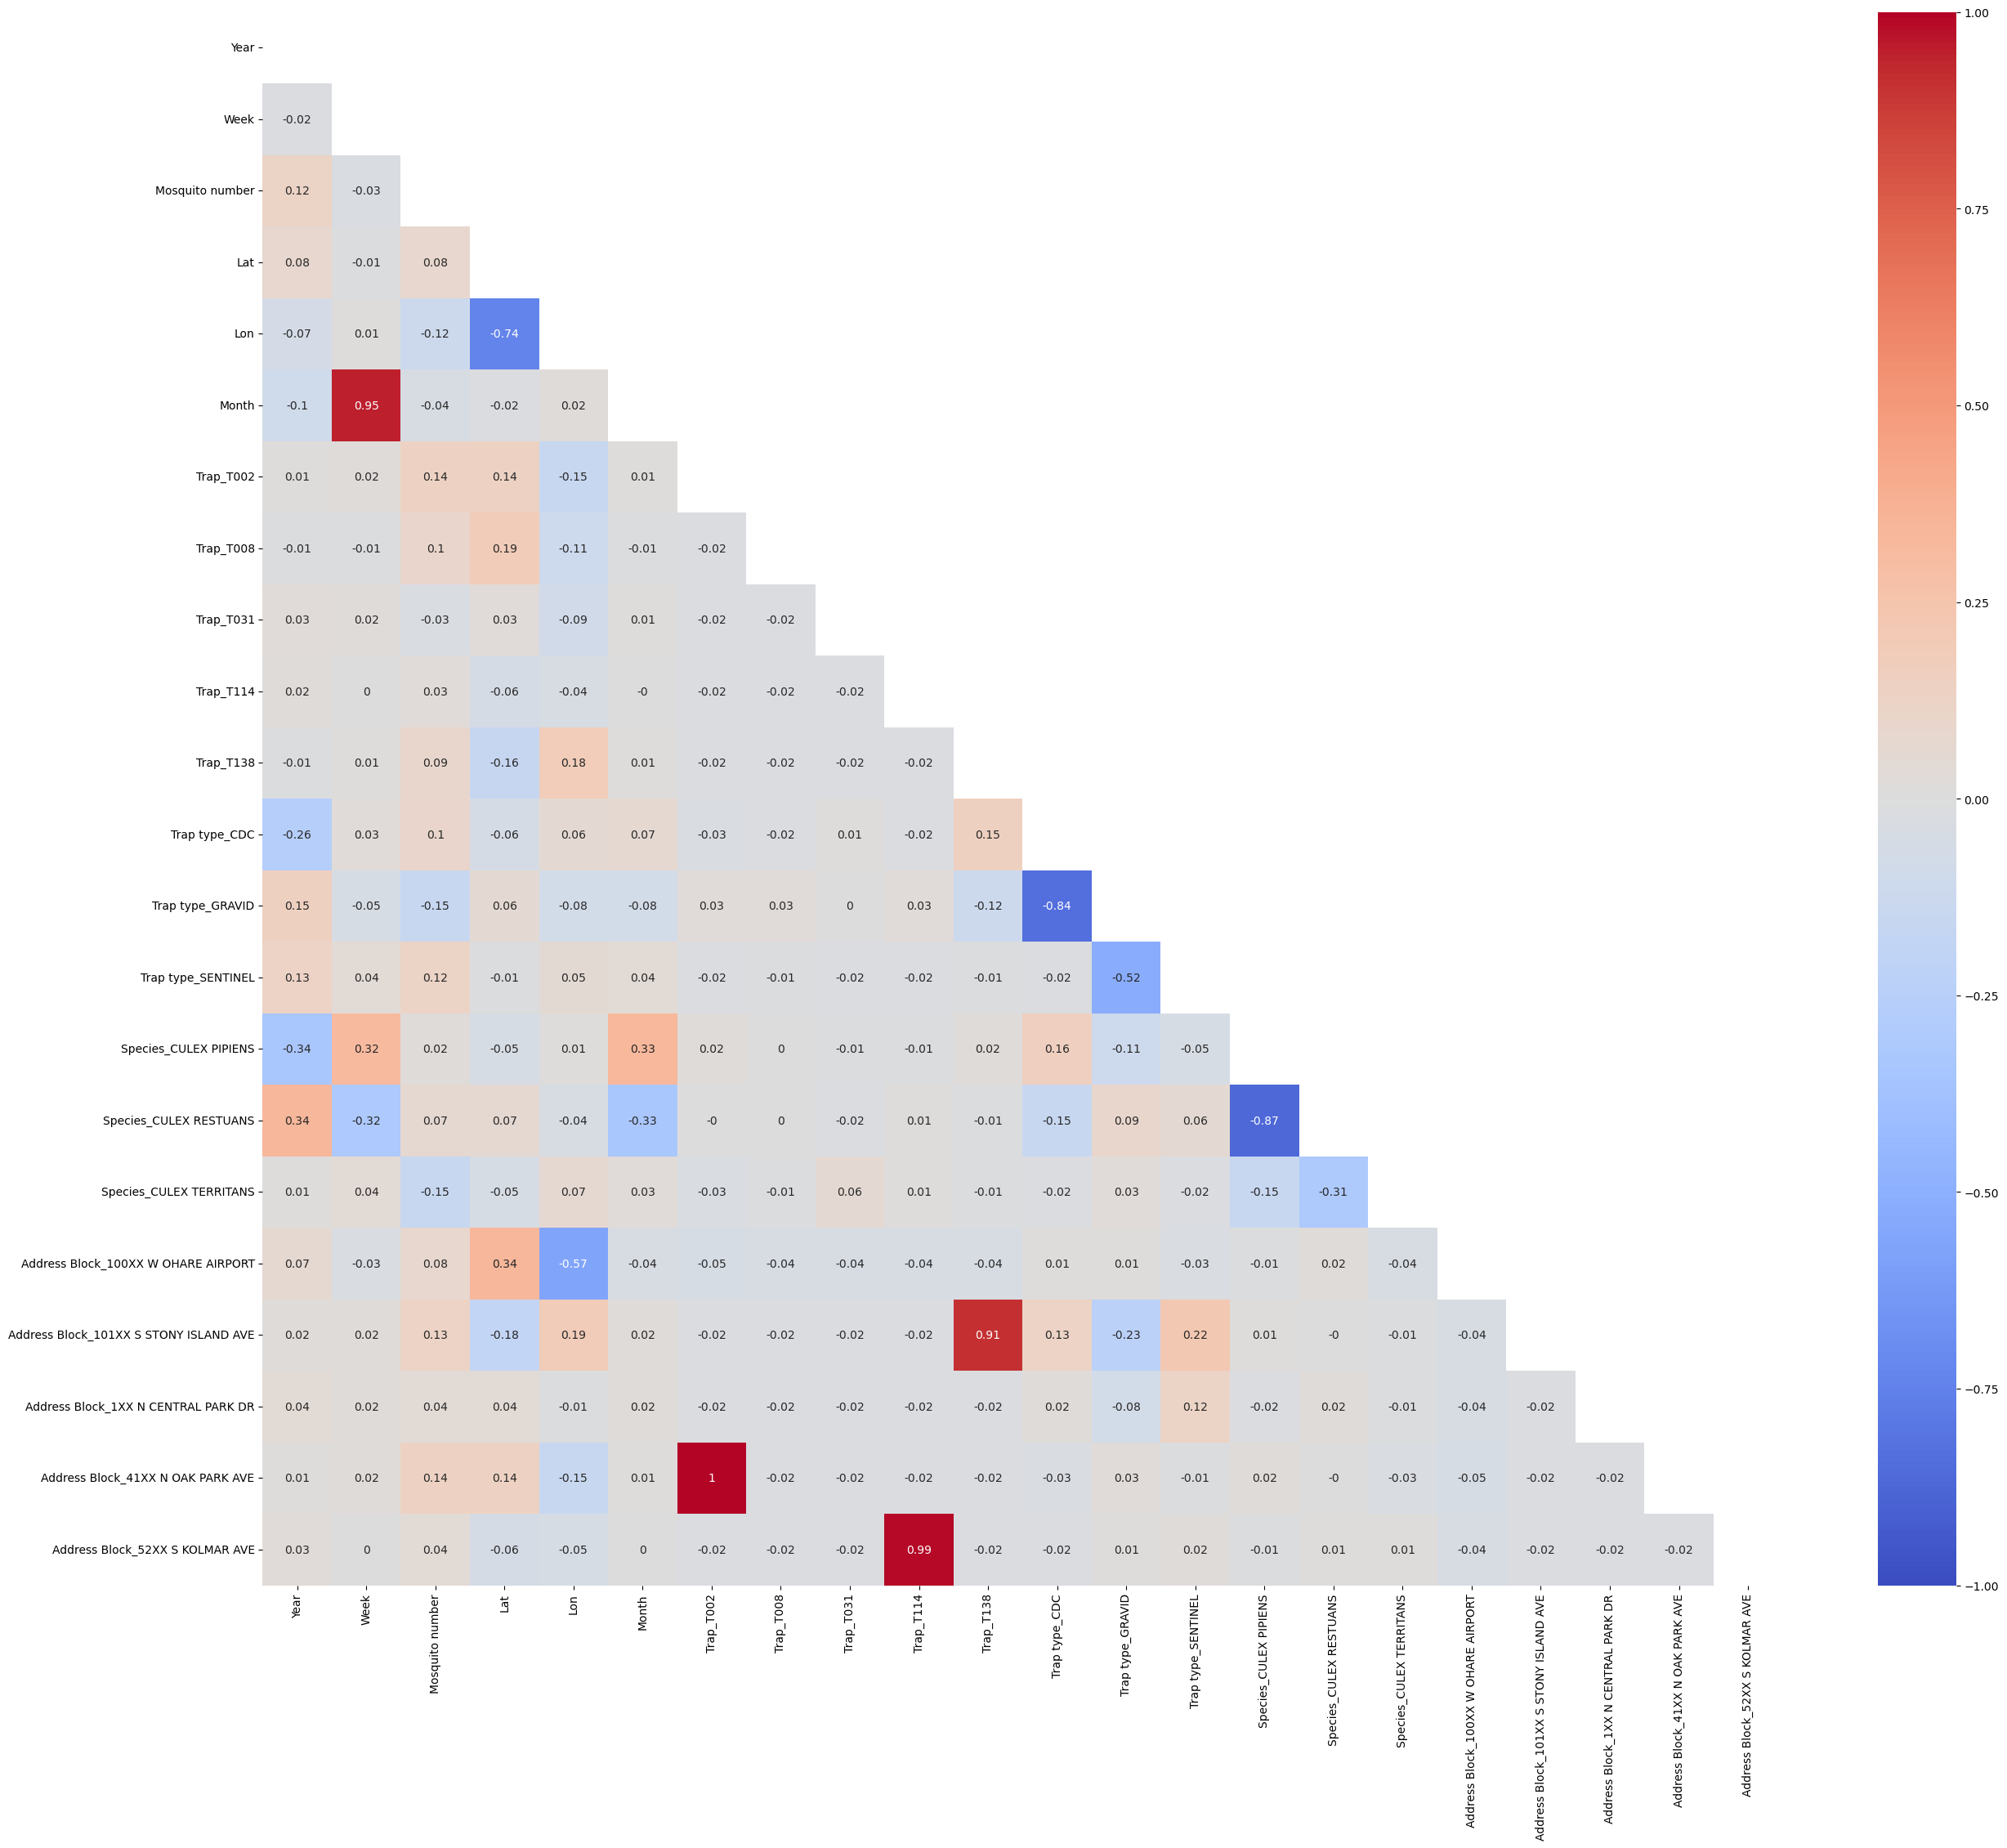

In [183]:
corr_df = X.corr()

# create a mask for the upper triangle in the corr matrix

mask = np.triu(corr_df)

# visualize with a heatmap

plt.figure(figsize = (30,25))

sns.heatmap(corr_df.round(2),annot = True,vmax = 1,vmin = -1,cmap = 'coolwarm',mask = mask)

Values above 0.5 are usually a concern. As we can see above, there is some strong collinearity in this dataset: for example, Trap_T002 is highly correlated with Address Block_41XX N OAK PARK AVE, and unsuprisingly Lat is negatively correlated with Lon column. We need to make sure to keep this in mind when building our model.
Columns with high positive correlation: 
- Trap_T002 and Address Block_41XX N OAK PARK AVE : 1
- Trap_T114 and Address Block_52XX S KOLMAR AVE : 0.99
- Month and Week : 0.95
- Trap_T138 and Address Block_101XX S STONY ISLAND AVE : 0.91

Columns with high negative correlation:
- Species_CULEX PIPIENS and Species_CULEX RESTUANS : -0.87 
- Trap type_CDC and Trap type_GRAVID : -0.84
- Lat and Lon : -0.74
- Lon and Address Block_100XX W OHARE AIRPORT : -0.57
- Trap type_SENTINEL and Trap type_GRAVID : -0.52

let's start by fitting a model on our entire independent variable matrix:

In [184]:
# step 1: add a column of ones for our intercept term

X_withconstant = sm.add_constant(X)

# step 2: instantiate

my_logit = sm.Logit(y,X_withconstant)

# step 3: fit

my_logit_fit = my_logit.fit()

# step 4: summary

my_logit_fit.summary()

         Current function value: 0.374095
         Iterations: 35


C:\Users\mahya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17837
Model:                          Logit   Df Residuals:                    17814
Method:                           MLE   Df Model:                           22
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.2237
Time:                        06:00:45   Log-Likelihood:                -6672.7
converged:                      False   LL-Null:                       -8595.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   -556.8302   3271.502     -0.170      0.865   -6968.856    5855.196
Year                                       0.1208      0.007     16.230      0.000       0.106       0.135
Week                                       0.0972      0.017      5.661      0.000       0.064       0.131
Mosquito number                            0.0671      0.002     42.180      0.000       0.064       0.070
Lat                                       -0.3387      0.310     -1.093      0.274      -0.946       0.269
Lon                                       -3.5051      0.438     -7.997      0.000      -4.364      -2.646
Month                                      0.2267      0.074      3.064      0.002       0.082       0.372
Trap_T002                                 13.4831   1182.799      0.011      0.991   -2304.761    2331.728
Trap_T008                                  0.1078      0.147      0.735      0.463      -0.180       0.395
Trap_T031                                  0.3436      0.146      2.355      0.019       0.058       0.630
Trap_T114                                  0.7586      0.807      0.940      0.347      -0.823       2.340
Trap_T138                                 -0.4859      0.394     -1.235      0.217      -1.257       0.285
Trap type_CDC                             12.2046   3271.318      0.004      0.997   -6399.461    6423.871
Trap type_GRAVID                          12.4210   3271.318      0.004      0.997   -6399.245    6424.087
Trap type_SENTINEL                        11.8604   3271.318      0.004      0.997   -6399.806    6423.526
Species_CULEX PIPIENS                      1.1544      0.399      2.893      0.004       0.372       1.937
Species_CULEX RESTUANS                     0.8259      0.399      2.072      0.038       0.045       1.607
Species_CULEX TERRITANS                   -1.2906      0.481     -2.684      0.007      -2.233      -0.348
Address Block_100XX W OHARE AIRPORT       -1.5475      0.109    -14.196      0.000      -1.761      -1.334
Address Block_101XX S STONY ISLAND AVE     0.5322      0.363      1.464      0.143      -0.180       1.245
Address Block_1XX N CENTRAL PARK DR        0.1373      0.144      0.953      0.340      -0.145       0.420
Address Block_41XX N OAK PARK AVE        -13.8281   1182.799     -0.012      0.991   -2332.072    2304.416
Address Block_52XX S KOLMAR AVE           -0.5794      0.796     -0.728      0.467      -2.139       0.980
==========================================================================================================
"""

In [185]:
my_logit_fit.predict(X_withconstant.iloc[0,:])

None    0.179848
dtype: float64

In [186]:
# we want to know what the model accuracy is

def accuracy_explorer(model,X,y):
    
    thresholds = np.arange(0,1,.01)
    accuracies = []
    
    for threshold in thresholds:
        
        # how many did we get right
        
        correct_predictions = ((model.predict(X) > threshold) ==  y).sum()
        
        
        # divide by the number of total observations
        
        accuracy = correct_predictions/y.shape[0]
        
        accuracies.append(accuracy)
        
    accuracy_df = pd.DataFrame({'threshold':thresholds,'accuracy':accuracies})    
        
    return accuracy_df
    
    



In [187]:
full_model_accuracy = accuracy_explorer(my_logit_fit,X_withconstant,y)

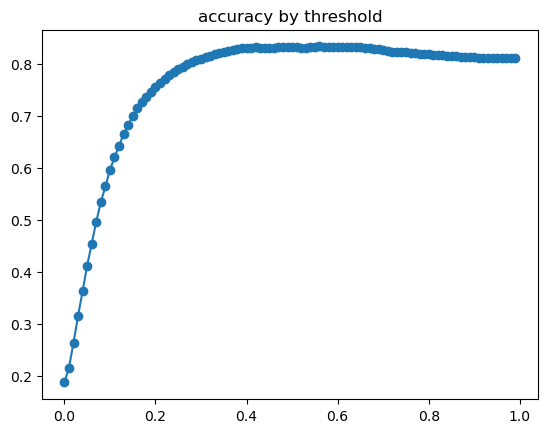

In [188]:
# plot the above

plt.figure()
plt.plot(full_model_accuracy['threshold'],full_model_accuracy['accuracy'])
plt.scatter(full_model_accuracy['threshold'],full_model_accuracy['accuracy'])
plt.title('accuracy by threshold')
plt.show()

In [189]:
full_model_accuracy.sort_values('accuracy',ascending = False)

,threshold,accuracy
56,0.56,0.834277
59,0.59,0.833941
55,0.55,0.833885
57,0.57,0.833716
49,0.49,0.833660
...,...,...
4,0.04,0.363178
3,0.03,0.315075
2,0.02,0.263609
1,0.01,0.215395


- at a threshold of .56 (predicting WNV Present = positive if the model predicts probability at least .56 of WNV Present = positive) we get nearly 84% accuracy.


In [193]:
# with any modeling, without knowning anything about relation between x and y
# we can get 81% accuracy by predicting that nobody registers

mosquito_df['WNV Present'].value_counts(normalize = True)

0    0.812973
1    0.187027
Name: WNV Present, dtype: float64

so with a model that has 84% accuracy, we have improved on our baseline by 3 points.


let's now build a simple model that we can use to explain the relationship between WNV Present and the independent variables in our data:

In [194]:
# pearson correlation

dummy_df.corr().loc[:,'WNV Present'].abs().sort_values(ascending = False)

WNV Present                               1.000000
Mosquito number                           0.389764
Week                                      0.176831
Month                                     0.163938
Year                                      0.137174
Species_CULEX TERRITANS                   0.102545
Species_CULEX PIPIENS                     0.076625
Trap_T002                                 0.070438
Address Block_41XX N OAK PARK AVE         0.069909
Lon                                       0.067129
Trap_T008                                 0.059066
Trap type_SENTINEL                        0.058669
Lat                                       0.055272
Address Block_100XX W OHARE AIRPORT       0.052523
Address Block_101XX S STONY ISLAND AVE    0.043422
Address Block_52XX S KOLMAR AVE           0.038126
Trap type_GRAVID                          0.036641
Address Block_1XX N CENTRAL PARK DR       0.035317
Trap_T114                                 0.035130
Trap_T031                      

In [195]:
dummy_df['Mosquito number'].describe()

count    17837.000000
mean        10.458822
std         13.182843
min          1.000000
25%          2.000000
50%          4.000000
75%         13.000000
max         50.000000
Name: Mosquito number, dtype: float64

In [196]:
# I need to subset X_withconstant to pull out const, and Mosquito number

X2 = X_withconstant.loc[:,['const','Mosquito number']]

# instantiate
# fit
# summarise

simple_logit_fit = sm.Logit(y,X2).fit()

simple_logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.418227
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17837
Model:                          Logit   Df Residuals:                    17835
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.1321
Time:                        06:16:45   Log-Likelihood:                -7459.9
converged:                       True   LL-Null:                       -8595.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.3018      0.029    -78.056      0.000      -2.360      -2.244
Mosquito number     0.0621      0.001     46.011      0.000       0.059       0.065
===================================================================================
"""

In [198]:
# what is the effect of one Mosquito increase in Mosquito number

np.exp(0.0621) # extra mosquito increases the odds of WNV Present by 6%

1.0640687462824956

In [199]:
# what is the accuracy of this model?

accuracy_explorer(simple_logit_fit,X2,y).sort_values('accuracy',ascending = False)

,threshold,accuracy
58,0.58,0.815384
59,0.59,0.815384
60,0.60,0.815047
54,0.54,0.814767
55,0.55,0.814543
...,...,...
6,0.06,0.187027
7,0.07,0.187027
8,0.08,0.187027
9,0.09,0.187027


Let's add another predictor

In [200]:
# Week is the next variable we'll add

# but first let's write a function that fits a logit model

def fit_logit(dependent_var,independent_vars):
    
    # instantiate
    
    my_model = sm.Logit(dependent_var,independent_vars).fit()
    
    return my_model

In [201]:
X3 = X_withconstant.loc[:,['const','Mosquito number','Week']]
simple_logit_fit2 = fit_logit(y,X3)

Optimization terminated successfully.
         Current function value: 0.394725
         Iterations 7


In [202]:
simple_logit_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17837
Model:                          Logit   Df Residuals:                    17834
Method:                           MLE   Df Model:                            2
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.1809
Time:                        06:25:27   Log-Likelihood:                -7040.7
converged:                       True   LL-Null:                       -8595.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.2008      0.187    -38.418      0.000      -7.568      -6.833
Mosquito number     0.0687      0.001     47.475      0.000       0.066       0.071
Week                0.1515      0.006     27.428      0.000       0.141       0.162
===================================================================================
"""

In [203]:
# higher beta for Week

np.exp(0.1515)

1.1635783018096755

# Third Model:

In [262]:
X4 = X_withconstant.loc[:,['const','Mosquito number','Week','Species_CULEX TERRITANS',
                           'Year','Species_CULEX PIPIENS','Lon','Trap_T008']]
simple_logit_fit3 = fit_logit(y,X4)

Optimization terminated successfully.
         Current function value: 0.382068
         Iterations 8


In [204]:
accuracy_explorer(simple_logit_fit2,X3,y).sort_values('accuracy',ascending = False)

,threshold,accuracy
52,0.52,0.828727
51,0.51,0.828727
62,0.62,0.828671
53,0.53,0.828503
55,0.55,0.828222
...,...,...
4,0.04,0.276111
3,0.03,0.224701
2,0.02,0.189886
1,0.01,0.187027


In [263]:
simple_logit_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17837
Model:                          Logit   Df Residuals:                    17829
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.2071
Time:                        06:49:42   Log-Likelihood:                -6814.9
converged:                       True   LL-Null:                       -8595.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -292.4578     24.034    -12.169      0.000    -339.563    -245.352
Mosquito number             0.0645      0.001     43.654      0.000       0.062       0.067
Week                        0.1484      0.006     25.007      0.000       0.137       0.160
Species_CULEX TERRITANS    -2.0917      0.273     -7.654      0.000      -2.627      -1.556
Year                        0.1141      0.007     16.547      0.000       0.101       0.128
Species_CULEX PIPIENS       0.3103      0.054      5.755      0.000       0.205       0.416
Lon                        -0.6351      0.234     -2.713      0.007      -1.094      -0.176
Trap_T008                   0.4091      0.140      2.921      0.003       0.135       0.684
===========================================================================================
"""

In [207]:
#really high beta for TERRITANS

np.exp(-2.2166) # 11% DECRESES the WNV Present

0.10897900826767906

In [264]:
# what is the accuracy of this model?

accuracy_explorer(simple_logit_fit3,X4,y).sort_values('accuracy',ascending = False)

,threshold,accuracy
57,0.57,0.834053
60,0.60,0.833941
58,0.58,0.833885
59,0.59,0.833492
56,0.56,0.833212
...,...,...
4,0.04,0.342827
3,0.03,0.296350
2,0.02,0.250827
1,0.01,0.208275


This model was the best I had by calculating many alternatives and it is so near to 84% with lower features.

# Visualization for Third Model ( Log_fit3):

In [288]:


simple_logit_fit3_betas = simple_logit_fit3.params

In [289]:
simple_logit_fit3_betas = simple_logit_fit3_betas.drop(index='const')

([<matplotlib.axis.YTick at 0x1c4463bb6d0>,
 [Text(0, 0, 'Mosquito number'),
  Text(0, 1, 'Week'),
  Text(0, 2, 'Species_CULEX TERRITANS'),
  Text(0, 3, 'Year'),
  Text(0, 4, 'Species_CULEX PIPIENS'),
  Text(0, 5, 'Lon'),
  Text(0, 6, 'Trap_T008')])

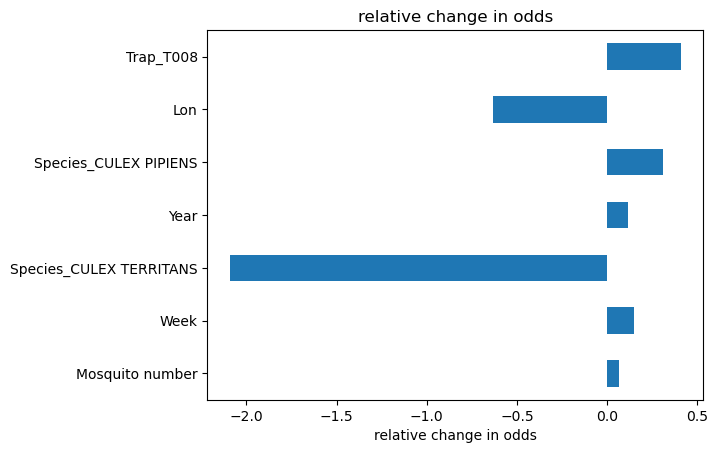

In [290]:
simple_logit_fit3_betas.plot(kind = 'barh')
plt.title("relative change in odds")
plt.xlabel("relative change in odds")
plt.yticks([0,1,2,3,4,5,6],['Mosquito number','Week','Species_CULEX TERRITANS',
                           'Year','Species_CULEX PIPIENS','Lon','Trap_T008'])

# Fourth model

In [272]:
X5 = X_withconstant.loc[:,['const','Mosquito number','Week','Species_CULEX TERRITANS',
                           'Year','Species_CULEX PIPIENS','Lon','Trap_T008','Address Block_101XX S STONY ISLAND AVE']]
simple_logit_fit4 = fit_logit(y,X5)

Optimization terminated successfully.
         Current function value: 0.382017
         Iterations 8


In [266]:
simple_logit_fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17837
Model:                          Logit   Df Residuals:                    17830
Method:                           MLE   Df Model:                            6
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                 0.08464
Time:                        06:51:24   Log-Likelihood:                -7867.8
converged:                       True   LL-Null:                       -8595.4
Covariance Type:            nonrobust   LLR p-value:                2.935e-311
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -385.2900     22.497    -17.126      0.000    -429.384    -341.196
Week                        0.1065      0.005     20.898      0.000       0.096       0.116
Species_CULEX TERRITANS    -2.7475      0.272    -10.110      0.000      -3.280      -2.215
Year                        0.1263      0.006     20.447      0.000       0.114       0.138
Species_CULEX PIPIENS       0.4075      0.048      8.452      0.000       0.313       0.502
Lon                        -1.4382      0.219     -6.569      0.000      -1.867      -1.009
Trap_T008                   0.9554      0.124      7.689      0.000       0.712       1.199
===========================================================================================
"""

In [273]:
# what is the accuracy of this model?

accuracy_explorer(simple_logit_fit4,X5,y).sort_values('accuracy',ascending = False)

,threshold,accuracy
60,0.60,0.833492
57,0.57,0.833492
58,0.58,0.833324
59,0.59,0.833212
56,0.56,0.833100
...,...,...
4,0.04,0.343443
3,0.03,0.296350
2,0.02,0.250883
1,0.01,0.208331


Adding other columns will decrease the accuracy: 83.3%.

So, the best model I could get from my data was simple_logit_fit3 

# Visualization for Fourth model( log_fit4)

In [291]:
# we can make a barchart to visualize the strength of each indepedent variable

simple_logit_fit4_betas = simple_logit_fit4.params

In [292]:
simple_logit_fit4_betas = simple_logit_fit4_betas.drop(index='const')

([<matplotlib.axis.YTick at 0x1c448a913d0>,
 [Text(0, 0, 'Mosquito number'),
  Text(0, 1, 'Week'),
  Text(0, 2, 'Species_CULEX TERRITANS'),
  Text(0, 3, 'Year'),
  Text(0, 4, 'Species_CULEX PIPIENS'),
  Text(0, 5, 'Lon'),
  Text(0, 6, 'Trap_T008'),
  Text(0, 7, 'Address Block_101XX S STONY ISLAND AVE')])

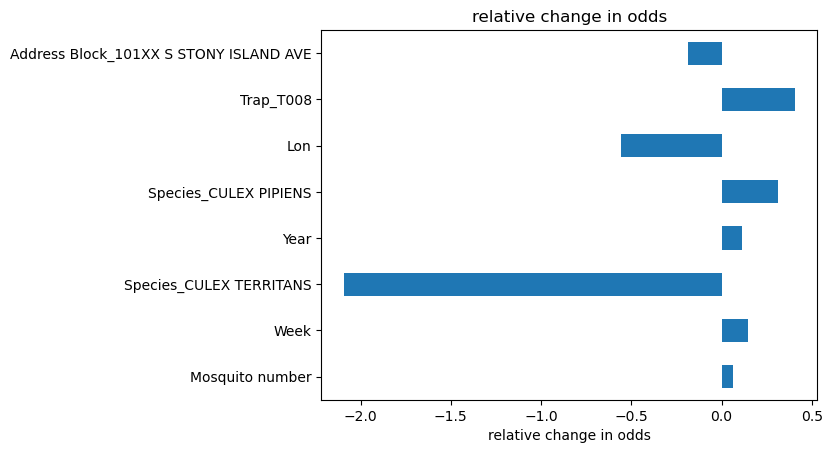

In [293]:
simple_logit_fit4_betas.plot(kind = 'barh')
plt.title("relative change in odds")
plt.xlabel("relative change in odds")
plt.yticks([0,1,2,3,4,5,6,7],['Mosquito number','Week','Species_CULEX TERRITANS',
                           'Year','Species_CULEX PIPIENS','Lon','Trap_T008','Address Block_101XX S STONY ISLAND AVE'])

### </font> <font color = magenta > Observations : </font>

- Our Thrid model was the best model that we got.
- TERRITANS Species have the most influence on WNV Presentand it is a negative influence. It means if the Specie is TERRITANS we are 2 times less likely to have WNV Present comparing to other variables.
- Also, we can see that Trap T008 has positive effect on WNV Present. It means that if we have T008 Trap, we are more likely to have WNV Present. 